In [126]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [3]:
#Read in the csv file and convert to a Pandas dataframe
df_2015 = pd.read_csv('Data/2015.csv')
df_2016 = pd.read_csv('Data/2016.csv')
df_2017 = pd.read_csv('Data/2017.csv')
df_2018 = pd.read_csv('Data/2018.csv')
df_2019 = pd.read_csv('Data/2019.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [4]:
df_2015.size, df_2015.shape

(1896, (158, 12))

In [5]:
df_2015.head(2)

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201

In [6]:
df_2016.size, df_2016.shape

(2041, (157, 13))

In [7]:
df_2016.head(2)

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463

In [8]:
df_2017.size, df_2017.shape

(1860, (155, 12))

In [9]:
df_2017.head(2)

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0   Norway               1            7.537      7.594445     7.479556   
1  Denmark               2            7.522      7.581728     7.462272   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707

In [10]:
df_2018.size, df_2018.shape

(1404, (156, 9))

In [11]:
df_2018.head(2)

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   

   Perceptions of corruption  
0                      0.393  
1                      0.340

In [12]:
df_2019.size, df_2019.shape

(1404, (156, 9))

In [13]:
df_2019.head(2)

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   

   Perceptions of corruption  
0                      0.393  
1                      0.410

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [14]:
df_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [15]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [16]:
df_2015.describe(include='object')

Country              Region
count           158                 158
unique          158                  10
top     Switzerland  Sub-Saharan Africa
freq              1                  40

In [17]:
df_2015.describe()

Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%                    0.910245    1.029510                  0.696705   
75%                    1.158448    1.214405                  0.811013   
max                    1.690420    1.402230                  1.025250   

          Freedom  Trust (Government Corruption)  Generosity  \
count  158.000000                     158.000000  158.000000   
mean     0.428615                       0.143422    0.237296   
std      0.150693                       0.120034    0.126685   
min      0.000000                       0.000000    0.000000   
25%      0.328330                       0.061675    0.150553   
50%      0.435515                       0.107220    0.216130   
75%      0.549092                       0.180255    0.309883   
max      0.669730                       0.551910    0.795880   

       Dystopia Residual  
count         158.000000  
mean            2.098977  
std             0.553550  
min             0.328580  
25%             1.759410  
50%             2.095415  
75%             2.462415  
max             3.602140

In [18]:
df_2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [19]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [20]:
df_2016.describe(include='object')

Country              Region
count       157                 157
unique      157                  10
top     Denmark  Sub-Saharan Africa
freq          1                  38

In [21]:
df_2016.describe()

Happiness Rank  Happiness Score  Lower Confidence Interval  \
count      157.000000       157.000000                 157.000000   
mean        78.980892         5.382185                   5.282395   
std         45.466030         1.141674                   1.148043   
min          1.000000         2.905000                   2.732000   
25%         40.000000         4.404000                   4.327000   
50%         79.000000         5.314000                   5.237000   
75%        118.000000         6.269000                   6.154000   
max        157.000000         7.526000                   7.460000   

       Upper Confidence Interval  Economy (GDP per Capita)      Family  \
count                 157.000000                157.000000  157.000000   
mean                    5.481975                  0.953880    0.793621   
std                     1.136493                  0.412595    0.266706   
min                     3.078000                  0.000000    0.000000   
25%                     4.465000                  0.670240    0.641840   
50%                     5.419000                  1.027800    0.841420   
75%                     6.434000                  1.279640    1.021520   
max                     7.669000                  1.824270    1.183260   

       Health (Life Expectancy)     Freedom  Trust (Government Corruption)  \
count                157.000000  157.000000                     157.000000   
mean                   0.557619    0.370994                       0.137624   
std                    0.229349    0.145507                       0.111038   
min                    0.000000    0.000000                       0.000000   
25%                    0.382910    0.257480                       0.061260   
50%                    0.596590    0.397470                       0.105470   
75%                    0.729930    0.484530                       0.175540   
max                    0.952770    0.608480                       0.505210   

       Generosity  Dystopia Residual  
count  157.000000         157.000000  
mean     0.242635           2.325807  
std      0.133756           0.542220  
min      0.000000           0.817890  
25%      0.154570           2.031710  
50%      0.222450           2.290740  
75%      0.311850           2.664650  
max      0.819710           3.837720

In [22]:
df_2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [23]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [24]:
df_2017.describe(include='object')

Country
count      155
unique     155
top     Norway
freq         1

In [25]:
df_2017.describe()

Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
count      155.000000       155.000000    155.000000   155.000000   
mean        78.000000         5.354019      5.452326     5.255713   
std         44.888751         1.131230      1.118542     1.145030   
min          1.000000         2.693000      2.864884     2.521116   
25%         39.500000         4.505500      4.608172     4.374955   
50%         78.000000         5.279000      5.370032     5.193152   
75%        116.500000         6.101500      6.194600     6.006527   
max        155.000000         7.537000      7.622030     7.479556   

       Economy..GDP.per.Capita.      Family  Health..Life.Expectancy.  \
count                155.000000  155.000000                155.000000   
mean                   0.984718    1.188898                  0.551341   
std                    0.420793    0.287263                  0.237073   
min                    0.000000    0.000000                  0.000000   
25%                    0.663371    1.042635                  0.369866   
50%                    1.064578    1.253918                  0.606042   
75%                    1.318027    1.414316                  0.723008   
max                    1.870766    1.610574                  0.949492   

          Freedom  Generosity  Trust..Government.Corruption.  \
count  155.000000  155.000000                     155.000000   
mean     0.408786    0.246883                       0.123120   
std      0.149997    0.134780                       0.101661   
min      0.000000    0.000000                       0.000000   
25%      0.303677    0.154106                       0.057271   
50%      0.437454    0.231538                       0.089848   
75%      0.516561    0.323762                       0.153296   
max      0.658249    0.838075                       0.464308   

       Dystopia.Residual  
count         155.000000  
mean            1.850238  
std             0.500028  
min             0.377914  
25%             1.591291  
50%             1.832910  
75%             2.144654  
max             3.117485

In [26]:
df_2018.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [27]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [28]:
df_2018.describe(include='object')

Country or region
count                156
unique               156
top              Finland
freq                   1

In [29]:
df_2018.describe()

Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.375917        0.891449        1.213237   
std       45.177428    1.119506        0.391921        0.302372   
min        1.000000    2.905000        0.000000        0.000000   
25%       39.750000    4.453750        0.616250        1.066750   
50%       78.500000    5.378000        0.949500        1.255000   
75%      117.250000    6.168500        1.197750        1.463000   
max      156.000000    7.632000        2.096000        1.644000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.597346                      0.454506    0.181006   
std                   0.247579                      0.162424    0.098471   
min                   0.000000                      0.000000    0.000000   
25%                   0.422250                      0.356000    0.109500   
50%                   0.644000                      0.487000    0.174000   
75%                   0.777250                      0.578500    0.239000   
max                   1.030000                      0.724000    0.598000   

       Perceptions of corruption  
count                 155.000000  
mean                    0.112000  
std                     0.096492  
min                     0.000000  
25%                     0.051000  
50%                     0.082000  
75%                     0.137000  
max                     0.457000

In [30]:
df_2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [31]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [32]:
df_2019.describe(include='object')

Country or region
count                156
unique               156
top              Finland
freq                   1

In [33]:
df_2019.describe()

Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%                   0.547750                      0.308000    0.108750   
50%                   0.789000                      0.417000    0.177500   
75%                   0.881750                      0.507250    0.248250   
max                   1.141000                      0.631000    0.566000   

       Perceptions of corruption  
count                 156.000000  
mean                    0.110603  
std                     0.094538  
min                     0.000000  
25%                     0.047000  
50%                     0.085500  
75%                     0.141250  
max                     0.453000

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [34]:
# in the kaggle page mentioned data source - "The happiness scores and rankings use data from the Gallup World Poll."

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [35]:
# The data represents the happines rankings from year 2015 to 2019

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [36]:
# After seeing the columns in all the datasets we can conclude that they have consistent columns

In [37]:
df_2015.head(2)

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201

In [38]:
df_2016.head(2)

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463

In [39]:
df_2017.head(2)

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0   Norway               1            7.537      7.594445     7.479556   
1  Denmark               2            7.522      7.581728     7.462272   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707

In [40]:
df_2018.head(2)

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   

   Perceptions of corruption  
0                      0.393  
1                      0.340

In [41]:
df_2019.head(2)

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   

   Perceptions of corruption  
0                      0.393  
1                      0.410

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [42]:
# In the datasets from 2017 till 2019 none of them had a region variable 
df_2015.drop(['Region'], axis=1, inplace=True)
df_2016.drop(['Region'], axis=1, inplace=True)

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [43]:
# First i ckecked the uniqueness for the 2015 set
df_2015.head(5)

Country  Happiness Rank  Happiness Score  Standard Error  \
0  Switzerland               1            7.587         0.03411   
1      Iceland               2            7.561         0.04884   
2      Denmark               3            7.527         0.03328   
3       Norway               4            7.522         0.03880   
4       Canada               5            7.427         0.03553   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   
1                   1.30232  1.40223                   0.94784  0.62877   
2                   1.32548  1.36058                   0.87464  0.64938   
3                   1.45900  1.33095                   0.88521  0.66973   
4                   1.32629  1.32261                   0.90563  0.63297   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.41978     0.29678            2.51738  
1                        0.14145     0.43630            2.70201  
2                        0.48357     0.34139            2.49204  
3                        0.36503     0.34699            2.46531  
4                        0.32957     0.45811            2.45176

In [44]:
# Count the number of the duplicated rows
df_2015.duplicated().sum()

np.int64(0)

In [45]:
# We can see that there is a duplicate row with the same ranking
df_2015.duplicated(['Happiness Rank']).sum()

np.int64(1)

In [46]:
# After further investigating we can see that Jordan and Montenegro has the same ranking
df_2015[df_2015.duplicated(['Happiness Rank'], keep=False)]
# Nothing to be deleted since they are different countries, could be a tie in the ranking

Country  Happiness Rank  Happiness Score  Standard Error  \
81      Jordan              82            5.192         0.04524   
82  Montenegro              82            5.192         0.05235   

    Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
81                   0.90198  1.05392                   0.69639  0.40661   
82                   0.97438  0.90557                   0.72521  0.18260   

    Trust (Government Corruption)  Generosity  Dystopia Residual  
81                        0.14293     0.11053            1.87996  
82                        0.14296     0.16140            2.10017

In [47]:
# After checking the uniqueness for 2015 now we check 2016
df_2016.head()

Country  Happiness Rank  Happiness Score  Lower Confidence Interval  \
0      Denmark               1            7.526                      7.460   
1  Switzerland               2            7.509                      7.428   
2      Iceland               3            7.501                      7.333   
3       Norway               4            7.498                      7.421   
4      Finland               5            7.413                      7.351   

   Upper Confidence Interval  Economy (GDP per Capita)   Family  \
0                      7.592                   1.44178  1.16374   
1                      7.590                   1.52733  1.14524   
2                      7.669                   1.42666  1.18326   
3                      7.575                   1.57744  1.12690   
4                      7.475                   1.40598  1.13464   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.79504  0.57941                        0.44453   
1                   0.86303  0.58557                        0.41203   
2                   0.86733  0.56624                        0.14975   
3                   0.79579  0.59609                        0.35776   
4                   0.81091  0.57104                        0.41004   

   Generosity  Dystopia Residual  
0     0.36171            2.73939  
1     0.28083            2.69463  
2     0.47678            2.83137  
3     0.37895            2.66465  
4     0.25492            2.82596

In [48]:
# Check the number of duplicated values in the 2016 set
df_2016.duplicated().sum()

np.int64(0)

In [49]:
# We can see that there are countries with the same ranking so we have to investigate more
df_2016.duplicated(['Happiness Rank']).sum()

np.int64(3)

In [50]:
# From the frame below we can see the countries with the same ranking
df_2016[df_2016.duplicated(['Happiness Rank'], keep=False)]
# Nothing to be deleted since they are different countries, could be a tie in the ranking

Country  Happiness Rank  Happiness Score  Lower Confidence Interval  \
33   Saudi Arabia              34            6.379                      6.287   
34         Taiwan              34            6.379                      6.305   
56         Poland              57            5.835                      5.749   
57    South Korea              57            5.835                      5.747   
144  Burkina Faso             145            3.739                      3.647   
145        Uganda             145            3.739                      3.629   

     Upper Confidence Interval  Economy (GDP per Capita)   Family  \
33                       6.471                   1.48953  0.84829   
34                       6.453                   1.39729  0.92624   
56                       5.921                   1.24585  1.04685   
57                       5.923                   1.35948  0.72194   
144                      3.831                   0.31995  0.63054   
145                      3.849                   0.34719  0.90981   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
33                    0.59267  0.37904                        0.30008   
34                    0.79565  0.32377                        0.06630   
56                    0.69058  0.45190                        0.05500   
57                    0.88645  0.25168                        0.07716   
144                   0.21297  0.33370                        0.12533   
145                   0.19625  0.43653                        0.06442   

     Generosity  Dystopia Residual  
33      0.15457            2.61482  
34      0.25495            2.61523  
56      0.14443            2.20035  
57      0.18824            2.35015  
144     0.24353            1.87319  
145     0.27102            1.51416

In [51]:
# Now we do the same for the 2017 dataset
df_2017.head()

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707  
2    0.475540                       0.153527           2.322715  
3    0.290549                       0.367007           2.276716  
4    0.245483                       0.382612           2.430182

In [52]:
# Check how many duplicates are in the dataset
df_2017.duplicated().sum()

np.int64(0)

In [53]:
# There are no countries with the same happiness ranking
df_2017.duplicated(['Happiness.Rank']).sum()

np.int64(0)

In [54]:
# There are 4 countries with the same happiness score
df_2017.duplicated(['Happiness.Score']).sum()

np.int64(4)

In [55]:
# Countries with the same happiness score are one posistion apart, unlike the previous years where countries with the same score got the same position
df_2017[df_2017.duplicated(['Happiness.Score'], keep=False)]

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
8        Sweden               9            7.284      7.344095     7.223905   
9     Australia              10            7.284      7.356651     7.211349   
27      Uruguay              28            6.454      6.545906     6.362094   
28    Guatemala              29            6.454      6.566874     6.341126   
54  South Korea              55            5.838      5.922559     5.753441   
55      Moldova              56            5.838      5.908371     5.767629   
93      Vietnam              94            5.074      5.147281     5.000719   
94      Nigeria              95            5.074      5.209500     4.938500   

    Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
8                   1.494387  1.478162                  0.830875  0.612924   
9                   1.484415  1.510042                  0.843887  0.601607   
27                  1.217560  1.412228                  0.719217  0.579392   
28                  0.872002  1.255585                  0.540240  0.531311   
54                  1.401678  1.128274                  0.900214  0.257922   
55                  0.728871  1.251826                  0.589465  0.240729   
93                  0.788548  1.277491                  0.652169  0.571056   
94                  0.783756  1.215770                  0.056916  0.394953   

    Generosity  Trust..Government.Corruption.  Dystopia.Residual  
8     0.385399                       0.384399           2.097538  
9     0.477699                       0.301184           2.065211  
27    0.175097                       0.178062           2.172410  
28    0.283488                       0.077223           2.893891  
54    0.206674                       0.063283           1.880378  
55    0.208779                       0.010091           2.807808  
93    0.234968                       0.087633           1.462319  
94    0.230947                       0.026122           2.365391

In [56]:
# Now we investigate 2018 dataset
df_2018.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  
0                      0.393  
1                      0.340  
2                      0.408  
3                      0.138  
4                      0.357

In [57]:
# Number of duplicates 
df_2018.duplicated().sum()

np.int64(0)

In [58]:
# No countries with the same rankning
df_2018.duplicated(['Overall rank']).sum()

np.int64(0)

In [59]:
# 2 duplicates with the same happiness score
df_2018.duplicated(['Score']).sum()

np.int64(2)

In [60]:
# Countries with the same happiness score
df_2018[df_2018.duplicated(['Score'], keep=False)]

Overall rank Country or region  Score  GDP per capita  Social support  \
72            73           Belarus  5.483           1.039           1.498   
73            74            Turkey  5.483           1.148           1.380   
78            79            Greece  5.358           1.154           1.202   
79            80           Lebanon  5.358           0.965           1.179   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
72                    0.700                         0.307       0.101   
73                    0.686                         0.324       0.106   
78                    0.879                         0.131       0.000   
79                    0.785                         0.503       0.214   

    Perceptions of corruption  
72                      0.154  
73                      0.109  
78                      0.044  
79                      0.136

In [61]:
# Now for the 2019 dataset
df_2019.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

In [62]:
# No identical rows aswell
df_2019.duplicated().sum()

np.int64(0)

In [63]:
# No countries with the same overall happiness rank
df_2019.duplicated(['Overall rank']).sum()

np.int64(0)

In [64]:
# it looks like only two countries have the same score
df_2019.duplicated(['Score']).sum()

np.int64(1)

In [65]:
# Since they are different countries there is no point in removing any
df_2019[df_2019.duplicated(['Score'], keep=False)]

Overall rank Country or region  Score  GDP per capita  Social support  \
88            89           Morocco  5.208           0.801           0.782   
89            90        Azerbaijan  5.208           1.043           1.147   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
88                    0.782                         0.418       0.036   
89                    0.769                         0.351       0.035   

    Perceptions of corruption  
88                      0.076  
89                      0.182

In [66]:
# Since there were no duplicated values such as the same country twice there is nothihg to remove from the datasets
# But there are countries with the same happiness score
# In the earlier datasets countries with the same score have the same rankning but the later datasets the ranking differs to one position apart even though they have the same ranking

In [67]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [68]:
# Check if the 2015 dataset has null values
df_2015.isnull().sum().sort_values(ascending=False)
# It appears that the 2015 dataset has no missing values, checked if there are any negative values which harms the logical meaning also checked if there are countries with no name entered

Country                          0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [69]:
# Check if there are any countreis with less than 4 letters since the shortest country name is 4 letters long
df_2015[df_2015['Country'].str.len() <= 3]

Empty DataFrame
Columns: [Country, Happiness Rank, Happiness Score, Standard Error, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual]
Index: []

In [70]:
df_2015.describe(include='object')

Country
count           158
unique          158
top     Switzerland
freq              1

In [71]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Happiness Rank                 158 non-null    int64  
 2   Happiness Score                158 non-null    float64
 3   Standard Error                 158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 13.7+ KB


In [72]:
# There are values that are zeros but since its a number than thats ok since it doesnt harm the mearning since for example the country doesnt trust the gov then 0 is justifiable but a negative score is not 
columns_to_check = ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 
                    'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
                      'Generosity', 'Dystopia Residual']
for column in columns_to_check:
    if (df_2015[column] < 0).any():
        print(f"Column '{column}' contains negative values.")
    else:
        print(f"Column '{column}' does not contain negative values.")

Column 'Happiness Rank' does not contain negative values.
Column 'Happiness Score' does not contain negative values.
Column 'Standard Error' does not contain negative values.
Column 'Economy (GDP per Capita)' does not contain negative values.
Column 'Family' does not contain negative values.
Column 'Health (Life Expectancy)' does not contain negative values.
Column 'Freedom' does not contain negative values.
Column 'Trust (Government Corruption)' does not contain negative values.
Column 'Generosity' does not contain negative values.
Column 'Dystopia Residual' does not contain negative values.


In [73]:
# Check the 2016 dataset
df_2016.isnull().sum().sort_values(ascending=False)
# Also the 2016 dataset has no missing values

Country                          0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [74]:
# Check if there are any countreis with less than 4 letters since the shortest country name is 4 letters long
df_2016[df_2016['Country'].str.len() <= 3]

Empty DataFrame
Columns: [Country, Happiness Rank, Happiness Score, Lower Confidence Interval, Upper Confidence Interval, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual]
Index: []

In [75]:
df_2016.describe(include='object')

Country
count       157
unique      157
top     Denmark
freq          1

In [76]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Happiness Rank                 157 non-null    int64  
 2   Happiness Score                157 non-null    float64
 3   Lower Confidence Interval      157 non-null    float64
 4   Upper Confidence Interval      157 non-null    float64
 5   Economy (GDP per Capita)       157 non-null    float64
 6   Family                         157 non-null    float64
 7   Health (Life Expectancy)       157 non-null    float64
 8   Freedom                        157 non-null    float64
 9   Trust (Government Corruption)  157 non-null    float64
 10  Generosity                     157 non-null    float64
 11  Dystopia Residual              157 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [77]:
# There are values that are zeros but since its a number than thats ok since it doesnt harm the mearning since for example the country doesnt trust the gov then 0 is justifiable but a negative score is not 
columns_to_check = ['Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 
                    'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom',
                    'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
for column in columns_to_check:
    if (df_2016[column] < 0).any():
        print(f"Column '{column}' contains negative values.")
    else:
        print(f"Column '{column}' does not contain negative values.")

Column 'Happiness Rank' does not contain negative values.
Column 'Happiness Score' does not contain negative values.
Column 'Lower Confidence Interval' does not contain negative values.
Column 'Upper Confidence Interval' does not contain negative values.
Column 'Economy (GDP per Capita)' does not contain negative values.
Column 'Family' does not contain negative values.
Column 'Health (Life Expectancy)' does not contain negative values.
Column 'Freedom' does not contain negative values.
Column 'Trust (Government Corruption)' does not contain negative values.
Column 'Generosity' does not contain negative values.
Column 'Dystopia Residual' does not contain negative values.


In [78]:
# Check the 2017 dataset
df_2017.isnull().sum().sort_values(ascending=False)
# Also the 2017 dataset has no missing values

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [79]:
# Check if there are any countreis with less than 4 letters since the shortest country name is 4 letters long
df_2017[df_2017['Country'].str.len() <= 3]

Empty DataFrame
Columns: [Country, Happiness.Rank, Happiness.Score, Whisker.high, Whisker.low, Economy..GDP.per.Capita., Family, Health..Life.Expectancy., Freedom, Generosity, Trust..Government.Corruption., Dystopia.Residual]
Index: []

In [80]:
df_2017.describe(include='object')

Country
count      155
unique     155
top     Norway
freq         1

In [81]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [82]:
df_2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [83]:
# There are values that are zeros but since its a number than thats ok since it doesnt harm the mearning since for example the country doesnt trust the gov then 0 is justifiable but a negative score is not 
columns_to_check = ['Happiness.Rank', 'Happiness.Score', 'Whisker.high',
                    'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
                    'Health..Life.Expectancy.', 'Freedom', 'Generosity',
                    'Trust..Government.Corruption.', 'Dystopia.Residual']

for column in columns_to_check:
    if (df_2017[column] < 0).any():
        print(f"Column '{column}' contains negative values.")
    else:
        print(f"Column '{column}' does not contain negative values.")

Column 'Happiness.Rank' does not contain negative values.
Column 'Happiness.Score' does not contain negative values.
Column 'Whisker.high' does not contain negative values.
Column 'Whisker.low' does not contain negative values.
Column 'Economy..GDP.per.Capita.' does not contain negative values.
Column 'Family' does not contain negative values.
Column 'Health..Life.Expectancy.' does not contain negative values.
Column 'Freedom' does not contain negative values.
Column 'Generosity' does not contain negative values.
Column 'Trust..Government.Corruption.' does not contain negative values.
Column 'Dystopia.Residual' does not contain negative values.


In [84]:
# Check the 2018 dataset
df_2018.isnull().sum().sort_values(ascending=False)

Perceptions of corruption       1
Overall rank                    0
Country or region               0
GDP per capita                  0
Score                           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
dtype: int64

In [85]:
# After cleaning the null values check to see if there are any other entered but invalid values

In [86]:
# Check if there are any countreis with less than 4 letters since the shortest country name is 4 letters long
df_2018[df_2018['Country or region'].str.len() <= 3]

Empty DataFrame
Columns: [Overall rank, Country or region, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption]
Index: []

In [87]:
df_2018.describe(include='object')

Country or region
count                156
unique               156
top              Finland
freq                   1

In [88]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [89]:
# There are values that are zeros but since its a number than thats ok since it doesnt harm the mearning since for example the country doesnt trust the gov then 0 is justifiable but a negative score is not 
columns_to_check = ['Overall rank', 'Score', 'GDP per capita',
                    'Social support', 'Healthy life expectancy',
                    'Freedom to make life choices', 'Generosity',
                    'Perceptions of corruption']

for column in columns_to_check:
    if (df_2018[column] < 0).any():
        print(f"Column '{column}' contains negative values.")
    else:
        print(f"Column '{column}' does not contain negative values.")

Column 'Overall rank' does not contain negative values.
Column 'Score' does not contain negative values.
Column 'GDP per capita' does not contain negative values.
Column 'Social support' does not contain negative values.
Column 'Healthy life expectancy' does not contain negative values.
Column 'Freedom to make life choices' does not contain negative values.
Column 'Generosity' does not contain negative values.
Column 'Perceptions of corruption' does not contain negative values.


In [90]:
# Check the 2019 dataset
df_2019.isnull().sum().sort_values(ascending=False)

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [91]:
# Check if there are any countreis with less than 4 letters since the shortest country name is 4 letters long
df_2019[df_2019['Country or region'].str.len() <= 3]

Empty DataFrame
Columns: [Overall rank, Country or region, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption]
Index: []

In [92]:
df_2019.describe(include='object')

Country or region
count                156
unique               156
top              Finland
freq                   1

In [93]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [94]:
df_2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [95]:
# There are values that are zeros but since its a number than thats ok since it doesnt harm the mearning since for example the country doesnt trust the gov then 0 is justifiable but a negative score is not 
columns_to_check = ['Overall rank', 'Score', 'GDP per capita',
                    'Social support', 'Healthy life expectancy',
                    'Freedom to make life choices', 'Generosity',
                    'Perceptions of corruption']

for column in columns_to_check:
    if (df_2019[column] < 0).any():
        print(f"Column '{column}' contains negative values.")
    else:
        print(f"Column '{column}' does not contain negative values.")

Column 'Overall rank' does not contain negative values.
Column 'Score' does not contain negative values.
Column 'GDP per capita' does not contain negative values.
Column 'Social support' does not contain negative values.
Column 'Healthy life expectancy' does not contain negative values.
Column 'Freedom to make life choices' does not contain negative values.
Column 'Generosity' does not contain negative values.
Column 'Perceptions of corruption' does not contain negative values.


In [96]:
# No further investigation is required since no column contains negative values as stated above
# Assume zeros dont harm the logical meaning since some values can truly be zero 

In [97]:
# After checking all datasets from 2015 to 2019 only the 2018 dataset has a single missing value, we go to data cleaning 

In [98]:
#Display number missing values per column

In [99]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [100]:
df_2015.dtypes
# All have the correct data type and the format is the same, so nothing to be changed

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [101]:
df_2015.head()

Country  Happiness Rank  Happiness Score  Standard Error  \
0  Switzerland               1            7.587         0.03411   
1      Iceland               2            7.561         0.04884   
2      Denmark               3            7.527         0.03328   
3       Norway               4            7.522         0.03880   
4       Canada               5            7.427         0.03553   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   
1                   1.30232  1.40223                   0.94784  0.62877   
2                   1.32548  1.36058                   0.87464  0.64938   
3                   1.45900  1.33095                   0.88521  0.66973   
4                   1.32629  1.32261                   0.90563  0.63297   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.41978     0.29678            2.51738  
1                        0.14145     0.43630            2.70201  
2                        0.48357     0.34139            2.49204  
3                        0.36503     0.34699            2.46531  
4                        0.32957     0.45811            2.45176

In [102]:
df_2016.dtypes
# All have the correct data type and the format is the same, so nothing to be changed

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [103]:
df_2016.head()

Country  Happiness Rank  Happiness Score  Lower Confidence Interval  \
0      Denmark               1            7.526                      7.460   
1  Switzerland               2            7.509                      7.428   
2      Iceland               3            7.501                      7.333   
3       Norway               4            7.498                      7.421   
4      Finland               5            7.413                      7.351   

   Upper Confidence Interval  Economy (GDP per Capita)   Family  \
0                      7.592                   1.44178  1.16374   
1                      7.590                   1.52733  1.14524   
2                      7.669                   1.42666  1.18326   
3                      7.575                   1.57744  1.12690   
4                      7.475                   1.40598  1.13464   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.79504  0.57941                        0.44453   
1                   0.86303  0.58557                        0.41203   
2                   0.86733  0.56624                        0.14975   
3                   0.79579  0.59609                        0.35776   
4                   0.81091  0.57104                        0.41004   

   Generosity  Dystopia Residual  
0     0.36171            2.73939  
1     0.28083            2.69463  
2     0.47678            2.83137  
3     0.37895            2.66465  
4     0.25492            2.82596

In [104]:
df_2017.dtypes
# All have the correct data type and the format is the same, so nothing to be changed

Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

In [105]:
df_2017.head()

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707  
2    0.475540                       0.153527           2.322715  
3    0.290549                       0.367007           2.276716  
4    0.245483                       0.382612           2.430182

In [106]:
df_2018.dtypes
# All have the correct data type and the format is the same, so nothing to be changed

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [107]:
df_2018.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  
0                      0.393  
1                      0.340  
2                      0.408  
3                      0.138  
4                      0.357

In [108]:
df_2019.dtypes
# All have the correct data type and the format is the same, so nothing to be changed

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [109]:
df_2019.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

In [110]:
# Checked the accuracy of the format, and its correct -> now check for the outliers 

In [111]:
# go to clean them 

In [112]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [113]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [114]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [266]:
# Outliers reflect genuine country variations
# Removing them would lose valuable data, so we retain all rows

In [271]:
cols_2015 = ["Happiness Score", "Economy (GDP per Capita)", "Health (Life Expectancy)", 
             "Trust (Government Corruption)", "Generosity"]
cond_2015 = ((zscore(df_2015[cols_2015[0]]) > 3) | (zscore(df_2015[cols_2015[0]]) < -3))
for col in cols_2015[1:]:
    cond_2015 |= ((zscore(df_2015[col]) > 3) | (zscore(df_2015[col]) < -3))
print("2015 Outliers (rows to be deleted):", df_2015[cond_2015].shape)
print(df_2015[cond_2015])

2015 Outliers (rows to be deleted): (3, 11)
     Country  Happiness Rank  Happiness Score  Standard Error  \
27     Qatar              28            6.611         0.06257   
128  Myanmar             129            4.307         0.04351   
153   Rwanda             154            3.465         0.03464   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
27                    1.69042  1.07860                   0.79733  0.64040   
128                   0.27108  0.70905                   0.48246  0.44017   
153                   0.22208  0.77370                   0.42864  0.59201   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
27                         0.52208     0.32573            1.55674  
128                        0.19034     0.79588            1.41805  
153                        0.55191     0.22628            0.67042  


In [272]:
cols_2016 = ["Happiness Score", "Economy (GDP per Capita)", "Health (Life Expectancy)", 
             "Trust (Government Corruption)", "Generosity"]
cond_2016 = ((zscore(df_2016[cols_2016[0]]) > 3) | (zscore(df_2016[cols_2016[0]]) < -3))
for col in cols_2016[1:]:
    cond_2016 |= ((zscore(df_2016[col]) > 3) | (zscore(df_2016[col]) < -3))
print("2016 Outliers (rows to be deleted):", df_2016[cond_2016].shape)
print(df_2016[cond_2016])


2016 Outliers (rows to be deleted): (4, 12)
       Country  Happiness Rank  Happiness Score  Lower Confidence Interval  \
21   Singapore              22            6.739                      6.674   
35       Qatar              36            6.375                      6.178   
118    Myanmar             119            4.395                      4.327   
151     Rwanda             152            3.515                      3.444   

     Upper Confidence Interval  Economy (GDP per Capita)   Family  \
21                       6.804                   1.64555  0.86758   
35                       6.572                   1.82427  0.87964   
118                      4.463                   0.34112  0.69981   
151                      3.586                   0.32846  0.61586   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
21                    0.94719  0.48770                        0.46987   
35                    0.71723  0.56679                        0.48049   


In [273]:
cols_2017 = ["Happiness.Score", "Economy..GDP.per.Capita.", "Health..Life.Expectancy.",
             "Trust..Government.Corruption.", "Generosity"]
cond_2017 = ((zscore(df_2017[cols_2017[0]]) > 3) | (zscore(df_2017[cols_2017[0]]) < -3))
for col in cols_2017[1:]:
    cond_2017 |= ((zscore(df_2017[col]) > 3) | (zscore(df_2017[col]) < -3))
print("2017 Outliers (rows to be deleted):", df_2017[cond_2017].shape)
print(df_2017[cond_2017])

2017 Outliers (rows to be deleted): (4, 12)
       Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
25   Singapore              26            6.572      6.636723     6.507277   
34       Qatar              35            6.375      6.568477     6.181523   
113    Myanmar             114            4.545      4.614740     4.475260   
150     Rwanda             151            3.471      3.543030     3.398970   

     Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
25                   1.692278  1.353814                  0.949492  0.549841   
34                   1.870766  1.274297                  0.710098  0.604131   
113                  0.367111  1.123236                  0.397523  0.514492   
150                  0.368746  0.945707                  0.326425  0.581844   

     Generosity  Trust..Government.Corruption.  Dystopia.Residual  
25     0.345966                       0.464308           1.216362  
34     0.330474                  

In [274]:
cols_2018 = ["Score", "GDP per capita", "Healthy life expectancy", "Generosity", "Perceptions of corruption"]
cond_2018 = ((zscore(df_2018[cols_2018[0]]) > 3) | (zscore(df_2018[cols_2018[0]]) < -3))
for col in cols_2018[1:]:
    cond_2018 |= ((zscore(df_2018[col]) > 3) | (zscore(df_2018[col]) < -3))
print("2018 Outliers (rows to be deleted):", df_2018[cond_2018].shape)
print(df_2018[cond_2018])

2018 Outliers (rows to be deleted): (6, 9)
     Overall rank     Country or region  Score  GDP per capita  \
2               3               Denmark  7.555           1.351   
19             20  United Arab Emirates  6.774           2.096   
33             34             Singapore  6.343           1.529   
95             96             Indonesia  5.093           0.899   
129           130               Myanmar  4.308           0.682   
150           151                Rwanda  3.408           0.332   

     Social support  Healthy life expectancy  Freedom to make life choices  \
2             1.590                    0.868                         0.683   
19            0.776                    0.670                         0.284   
33            1.451                    1.008                         0.631   
95            1.215                    0.522                         0.538   
129           1.174                    0.429                         0.580   
150           0.896       

In [275]:
cols_2019 = ["Score", "GDP per capita", "Healthy life expectancy", "Generosity", "Perceptions of corruption"]
cond_2019 = ((zscore(df_2019[cols_2019[0]]) > 3) | (zscore(df_2019[cols_2019[0]]) < -3))
for col in cols_2019[1:]:
    cond_2019 |= ((zscore(df_2019[col]) > 3) | (zscore(df_2019[col]) < -3))
print("2019 Outliers (rows to be deleted):", df_2019[cond_2019].shape)
print(df_2019[cond_2019])

2019 Outliers (rows to be deleted): (6, 9)
     Overall rank Country or region  Score  GDP per capita  Social support  \
1               2           Denmark  7.600           1.383           1.573   
33             34         Singapore  6.262           1.572           1.463   
91             92         Indonesia  5.192           0.931           1.203   
130           131           Myanmar  4.360           0.710           1.181   
134           135         Swaziland  4.212           0.811           1.149   
151           152            Rwanda  3.334           0.359           0.711   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
1                      0.996                         0.592       0.252   
33                     1.141                         0.556       0.271   
91                     0.660                         0.491       0.498   
130                    0.555                         0.525       0.566   
134                    0.000            

In [277]:
# After careful consideration, ive decided to keep all rows in the dataset
# Although some outliers are present, they represent real and meaningful variations between countries

In [115]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [116]:
# The only missing value we have
df_2018[df_2018['Perceptions of corruption'].isnull()]

Overall rank     Country or region  Score  GDP per capita  Social support  \
19            20  United Arab Emirates  6.774           2.096           0.776   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
19                     0.67                         0.284       0.186   

    Perceptions of corruption  
19                        NaN

In [117]:
# Check the rankings for UAE to see if it changes every year or is it stable
df_2015[df_2015['Country'] == 'United Arab Emirates']

Country  Happiness Rank  Happiness Score  Standard Error  \
19  United Arab Emirates              20            6.901         0.03729   

    Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
19                   1.42727  1.12575                   0.80925  0.64157   

    Trust (Government Corruption)  Generosity  Dystopia Residual  
19                        0.38583     0.26428            2.24743

In [118]:
df_2016[df_2016['Country'] == 'United Arab Emirates']

Country  Happiness Rank  Happiness Score  \
27  United Arab Emirates              28            6.573   

    Lower Confidence Interval  Upper Confidence Interval  \
27                      6.494                      6.652   

    Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
27                   1.57352  0.87114                   0.72993  0.56215   

    Trust (Government Corruption)  Generosity  Dystopia Residual  
27                        0.35561     0.26591            2.21507

In [119]:
df_2017[df_2017['Country'] == 'United Arab Emirates']

Country  Happiness.Rank  Happiness.Score  Whisker.high  \
20  United Arab Emirates              21            6.648      6.722047   

    Whisker.low  Economy..GDP.per.Capita.   Family  Health..Life.Expectancy.  \
20     6.573952                  1.626343  1.26641                  0.726798   

     Freedom  Generosity  Trust..Government.Corruption.  Dystopia.Residual  
20  0.608345    0.360942                        0.32449           1.734704

In [120]:
df_2019[df_2019['Country or region'] == 'United Arab Emirates']

Overall rank     Country or region  Score  GDP per capita  Social support  \
20            21  United Arab Emirates  6.825           1.503            1.31   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
20                    0.825                         0.598       0.262   

    Perceptions of corruption  
20                      0.182

In [121]:
# It appears that the perception of coruption descreases every year so the best choice might be getting the mean of 2017 and 2019 values to fill the missing 2018 value
value_2017 = df_2017[df_2017['Country'] == 'United Arab Emirates']['Trust..Government.Corruption.'].values[0]
value_2019 = df_2019[df_2019['Country or region'] == 'United Arab Emirates']['Perceptions of corruption'].values[0]
print(f"The 2017 coruption value: {value_2017}")
print(f"The 2019 coruption value: {value_2019}")

The 2017 coruption value: 0.324489563703537
The 2019 coruption value: 0.182


In [122]:
# Now we after the calculation we place the value instead of the null 
value_2018 = (value_2017 + value_2019) / 2
df_2018.loc[df_2018['Country or region'] == 'United Arab Emirates', 'Perceptions of corruption'] = value_2018
df_2018[df_2018['Country or region'] == 'United Arab Emirates']

Overall rank     Country or region  Score  GDP per capita  Social support  \
19            20  United Arab Emirates  6.774           2.096           0.776   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
19                     0.67                         0.284       0.186   

    Perceptions of corruption  
19                   0.253245

In [123]:
df_2018.isnull().sum().sort_values(ascending=False)

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [124]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [125]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### 2015

In [130]:
df_2015.head()

Country  Happiness Rank  Happiness Score  Standard Error  \
0  Switzerland               1            7.587         0.03411   
1      Iceland               2            7.561         0.04884   
2      Denmark               3            7.527         0.03328   
3       Norway               4            7.522         0.03880   
4       Canada               5            7.427         0.03553   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   
1                   1.30232  1.40223                   0.94784  0.62877   
2                   1.32548  1.36058                   0.87464  0.64938   
3                   1.45900  1.33095                   0.88521  0.66973   
4                   1.32629  1.32261                   0.90563  0.63297   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.41978     0.29678            2.51738  
1                        0.14145     0.43630            2.70201  
2                        0.48357     0.34139            2.49204  
3                        0.36503     0.34699            2.46531  
4                        0.32957     0.45811            2.45176

In [131]:
df_2015.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

#### 2016

In [132]:
df_2016.head()

Country  Happiness Rank  Happiness Score  Lower Confidence Interval  \
0      Denmark               1            7.526                      7.460   
1  Switzerland               2            7.509                      7.428   
2      Iceland               3            7.501                      7.333   
3       Norway               4            7.498                      7.421   
4      Finland               5            7.413                      7.351   

   Upper Confidence Interval  Economy (GDP per Capita)   Family  \
0                      7.592                   1.44178  1.16374   
1                      7.590                   1.52733  1.14524   
2                      7.669                   1.42666  1.18326   
3                      7.575                   1.57744  1.12690   
4                      7.475                   1.40598  1.13464   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.79504  0.57941                        0.44453   
1                   0.86303  0.58557                        0.41203   
2                   0.86733  0.56624                        0.14975   
3                   0.79579  0.59609                        0.35776   
4                   0.81091  0.57104                        0.41004   

   Generosity  Dystopia Residual  
0     0.36171            2.73939  
1     0.28083            2.69463  
2     0.47678            2.83137  
3     0.37895            2.66465  
4     0.25492            2.82596

In [133]:
df_2016.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

#### 2017

In [135]:
df_2017.head()

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707  
2    0.475540                       0.153527           2.322715  
3    0.290549                       0.367007           2.276716  
4    0.245483                       0.382612           2.430182

In [136]:
df_2017.dtypes

Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

#### 2018

In [137]:
df_2018.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  
0                      0.393  
1                      0.340  
2                      0.408  
3                      0.138  
4                      0.357

In [138]:
df_2018.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

#### 2019

In [139]:
df_2019.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

In [140]:
df_2019.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

In [143]:
# Each dataset contains only one categorical column: 'country'. Since every country appears only once in the dataset, there are no meaningful charts to plot for the categorical variables

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

#### 2015

In [144]:
df_2015.head(2)

Country  Happiness Rank  Happiness Score  Standard Error  \
0  Switzerland               1            7.587         0.03411   
1      Iceland               2            7.561         0.04884   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   
1                   1.30232  1.40223                   0.94784  0.62877   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.41978     0.29678            2.51738  
1                        0.14145     0.43630            2.70201

In [204]:
# Histograms are plotted for selected numerical columns to analyze their distributions and check for potential outliers
# The chosen columns are:
# - Happiness Score: A key metric to understand overall happiness distribution
# - Economy (GDP per Capita): To identify economic disparities or outliers in GDP contributions
# - Health (Life Expectancy): To spot potential outliers in life expectancy contributions
# - Trust (Government Corruption): To detect extreme values in government trust levels
# - Generosity: To observe skewness or potential outliers in generosity scores


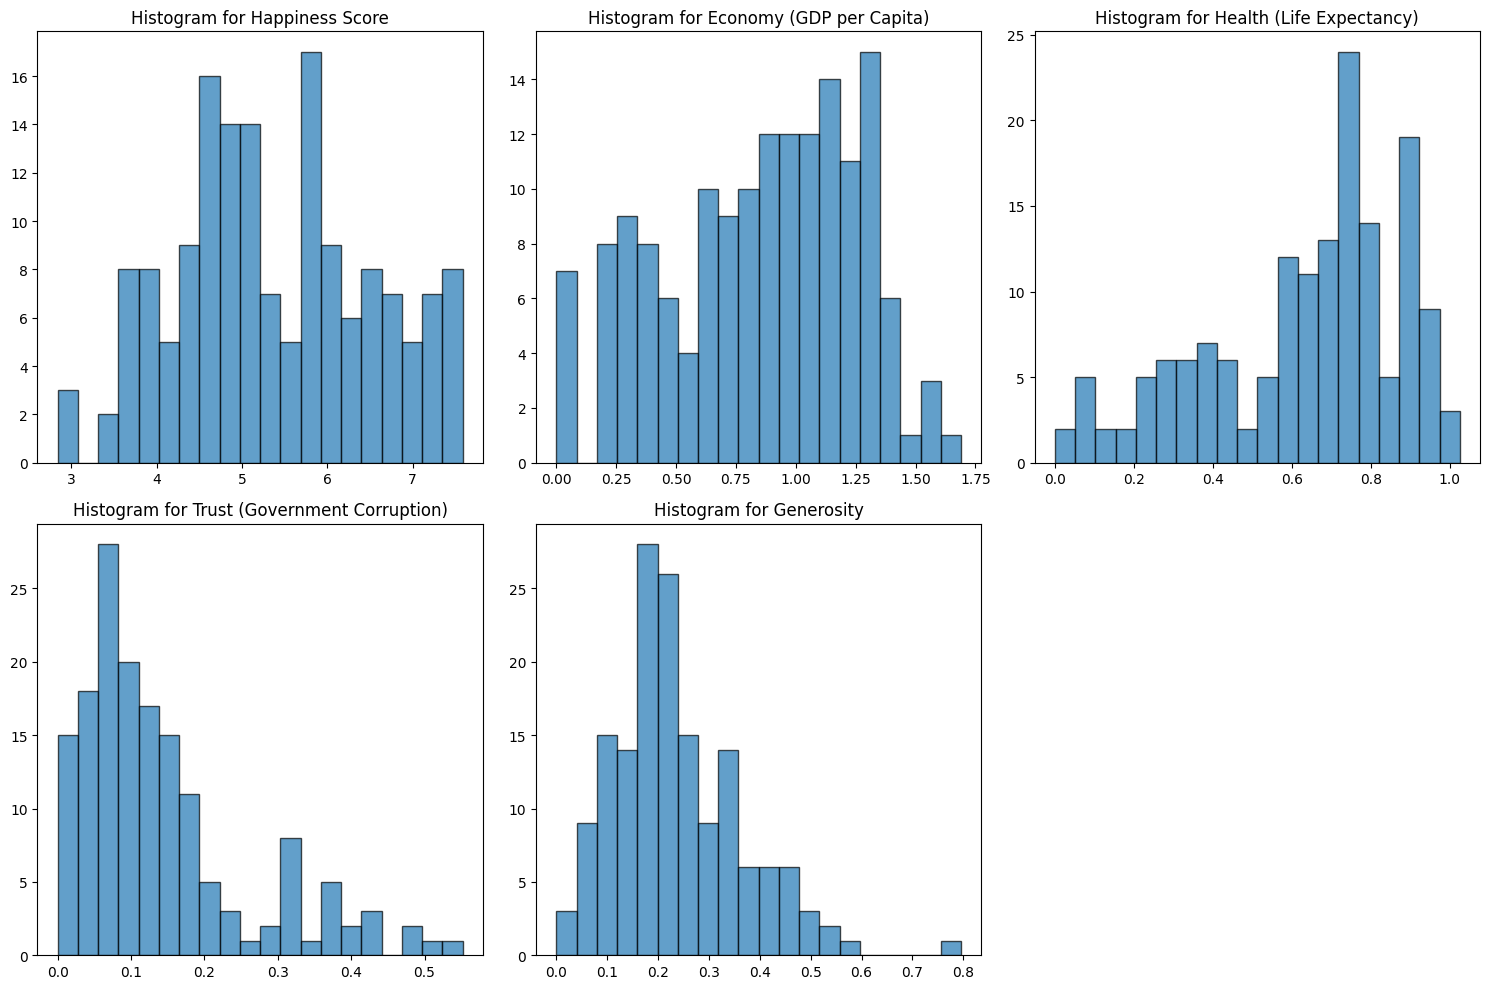

In [206]:
# List of columns to plot
columns = [
    "Happiness Score", 
    "Economy (GDP per Capita)", 
    "Health (Life Expectancy)", 
    "Trust (Government Corruption)", 
    "Generosity"
]

# Create a figure with space for 6 subplots (we'll leave one empty)
plt.figure(figsize=(15, 10))

# Plot each histogram in a 2x3 grid
for i in range(len(columns)):
    plt.subplot(2, 3, i+1)
    plt.hist(df_2015[columns[i]], bins=20, edgecolor='black', alpha=0.7)
    plt.title("Histogram for " + columns[i])

plt.tight_layout()
plt.show()

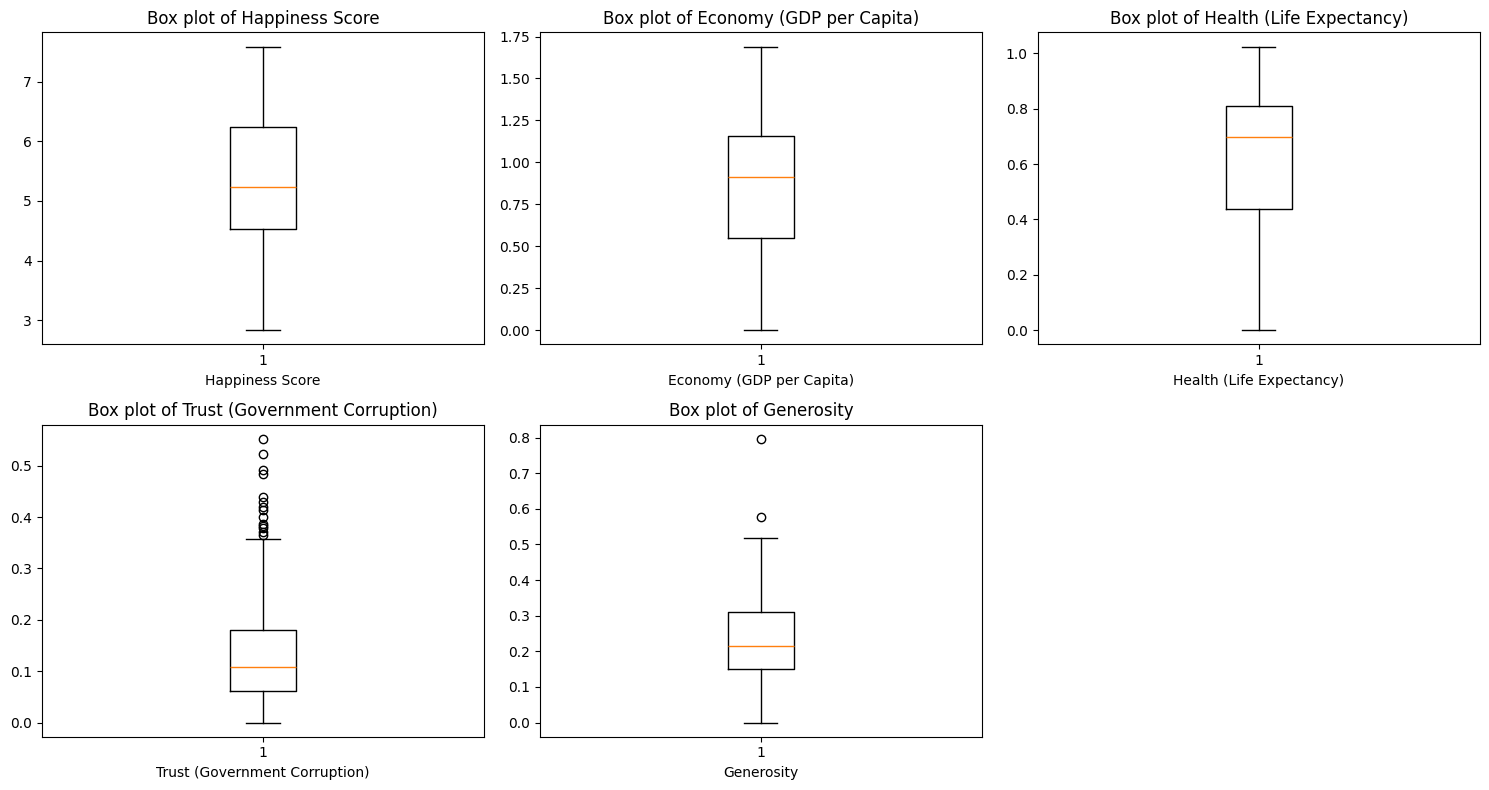

In [212]:
# List of columns for which we want to create box plots
columns = [
    "Happiness Score", 
    "Economy (GDP per Capita)", 
    "Health (Life Expectancy)", 
    "Trust (Government Corruption)", 
    "Generosity"
]

# Create a figure with subplots (2 rows x 3 columns) - one subplot will remain empty.
plt.figure(figsize=(15,8))

# Loop through each column and create a box plot
for i, col in enumerate(columns):
    plt.subplot(2, 3, i+1)
    plt.boxplot(df_2015[col])
    plt.xlabel(col)
    plt.title("Box plot of " + col)

plt.tight_layout()
plt.show()

#### 2016

In [210]:
df_2016.head()

Country  Happiness Rank  Happiness Score  Lower Confidence Interval  \
0      Denmark               1            7.526                      7.460   
1  Switzerland               2            7.509                      7.428   
2      Iceland               3            7.501                      7.333   
3       Norway               4            7.498                      7.421   
4      Finland               5            7.413                      7.351   

   Upper Confidence Interval  Economy (GDP per Capita)   Family  \
0                      7.592                   1.44178  1.16374   
1                      7.590                   1.52733  1.14524   
2                      7.669                   1.42666  1.18326   
3                      7.575                   1.57744  1.12690   
4                      7.475                   1.40598  1.13464   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.79504  0.57941                        0.44453   
1                   0.86303  0.58557                        0.41203   
2                   0.86733  0.56624                        0.14975   
3                   0.79579  0.59609                        0.35776   
4                   0.81091  0.57104                        0.41004   

   Generosity  Dystopia Residual  
0     0.36171            2.73939  
1     0.28083            2.69463  
2     0.47678            2.83137  
3     0.37895            2.66465  
4     0.25492            2.82596

In [211]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Happiness Rank                 157 non-null    int64  
 2   Happiness Score                157 non-null    float64
 3   Lower Confidence Interval      157 non-null    float64
 4   Upper Confidence Interval      157 non-null    float64
 5   Economy (GDP per Capita)       157 non-null    float64
 6   Family                         157 non-null    float64
 7   Health (Life Expectancy)       157 non-null    float64
 8   Freedom                        157 non-null    float64
 9   Trust (Government Corruption)  157 non-null    float64
 10  Generosity                     157 non-null    float64
 11  Dystopia Residual              157 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [213]:
# Histograms are plotted for selected numerical columns from the 2016 happiness dataset 
# to analyze their distributions and check for potential outliers.
# The chosen columns are:
# - Happiness Score: A key metric; understanding its distribution is essential
# - Economy (GDP per Capita): Likely to reveal economic disparities or outliers
# - Health (Life Expectancy): Useful for spotting outliers in life expectancy
# - Trust (Government Corruption): May reveal extreme values
# - Generosity: Likely to have a skewed distribution or potential outliers

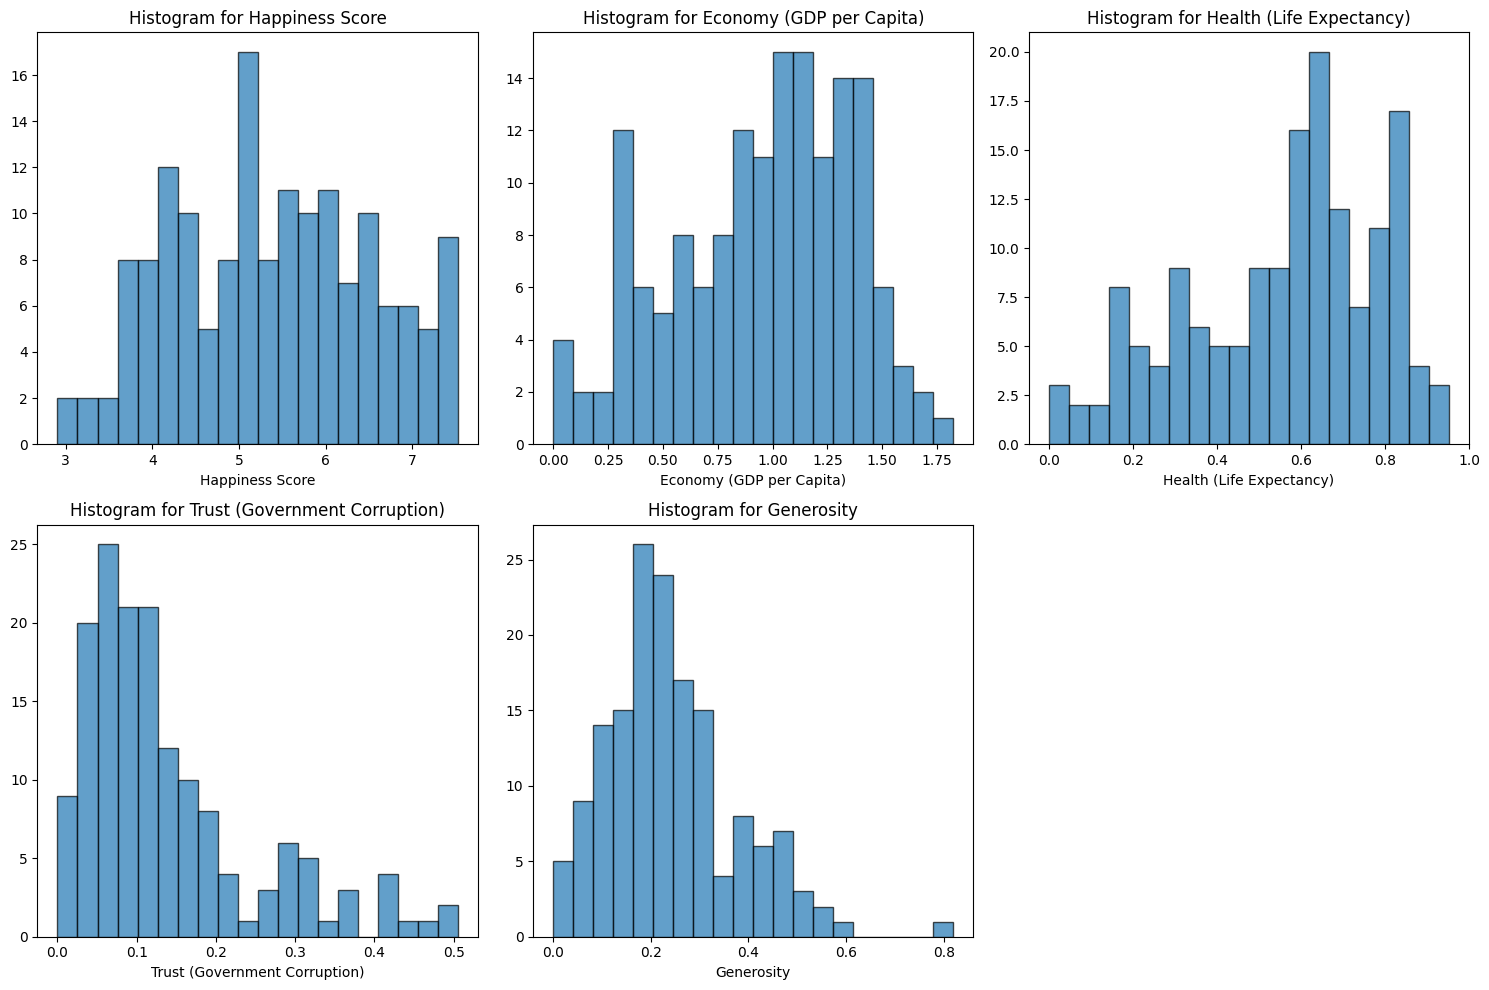

In [214]:
columns = [
    "Happiness Score", 
    "Economy (GDP per Capita)", 
    "Health (Life Expectancy)", 
    "Trust (Government Corruption)", 
    "Generosity"
]

plt.figure(figsize=(15, 10))

# Plot a histogram for each selected column
for i, col in enumerate(columns):
    plt.subplot(2, 3, i+1)
    plt.hist(df_2016[col], bins=20, edgecolor='black', alpha=0.7)
    plt.title("Histogram for " + col)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

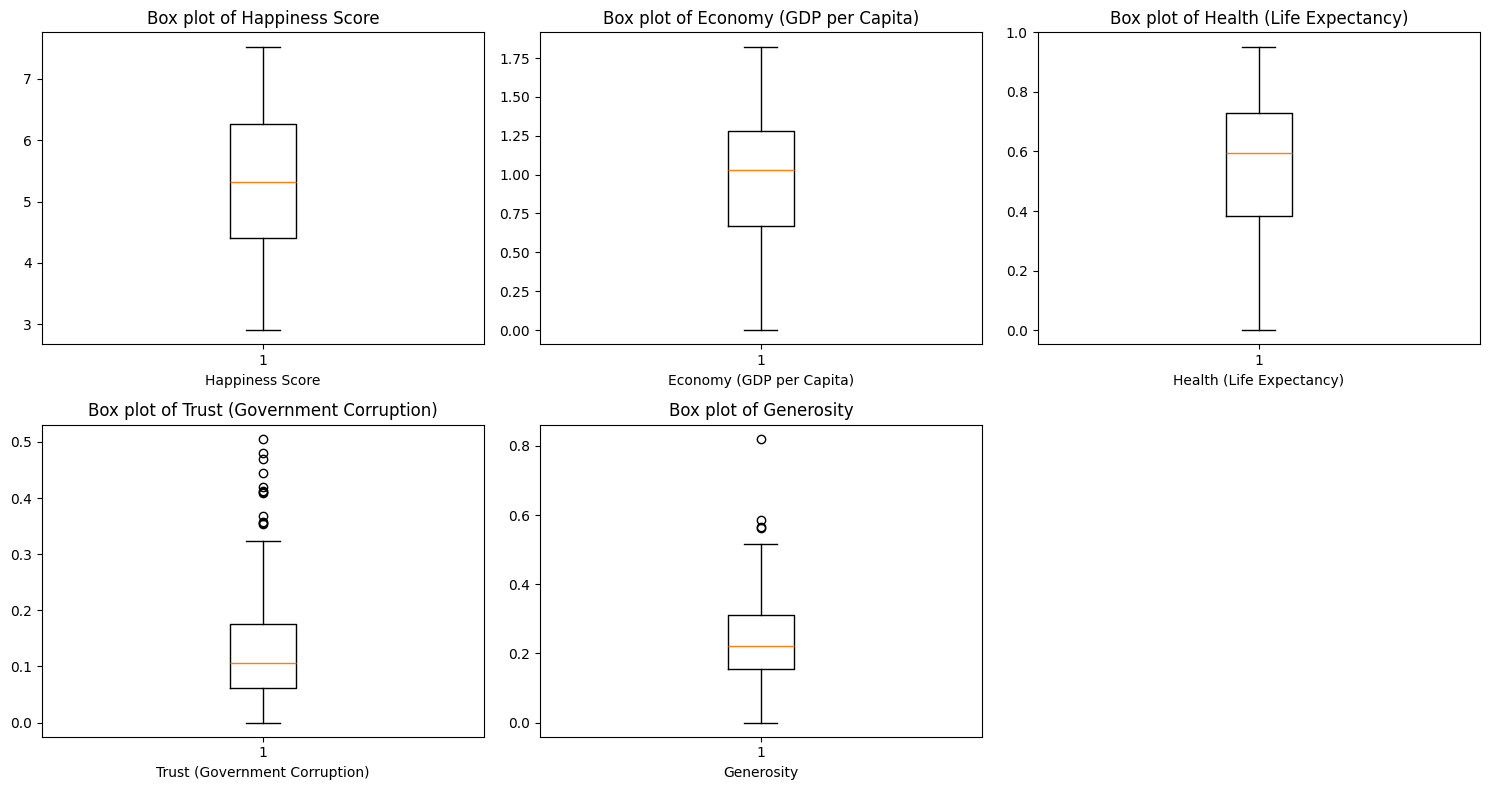

In [215]:
columns = [
    "Happiness Score",
    "Economy (GDP per Capita)",
    "Health (Life Expectancy)",
    "Trust (Government Corruption)",
    "Generosity"
]

plt.figure(figsize=(15, 8))

# Loop through each selected column and create a box plot in a 2x3 grid layout
for i, col in enumerate(columns):
    plt.subplot(2, 3, i+1)
    plt.boxplot(df_2016[col])
    plt.xlabel(col)
    plt.title("Box plot of " + col)

# Hide any unused subplot (if exists)
if len(columns) < 6:
    plt.subplot(2, 3, len(columns)+1).axis('off')

plt.tight_layout()
plt.show()

#### 2017

In [216]:
df_2017.head()

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707  
2    0.475540                       0.153527           2.322715  
3    0.290549                       0.367007           2.276716  
4    0.245483                       0.382612           2.430182

In [217]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [218]:
# Histograms are plotted for selected numerical columns from the 2017 happiness dataset
# to analyze their distributions and check for potential outliers
# The chosen columns are:
# - Happiness.Score: A key metric; understanding its distribution is essential
# - Economy..GDP.per.Capita.: Likely to reveal economic disparities or outliers
# - Health..Life.Expectancy.: Useful for spotting outliers in life expectancy
# - Trust..Government.Corruption.: May reveal extreme values
# - Generosity: Likely to have a skewed distribution or potential outliers

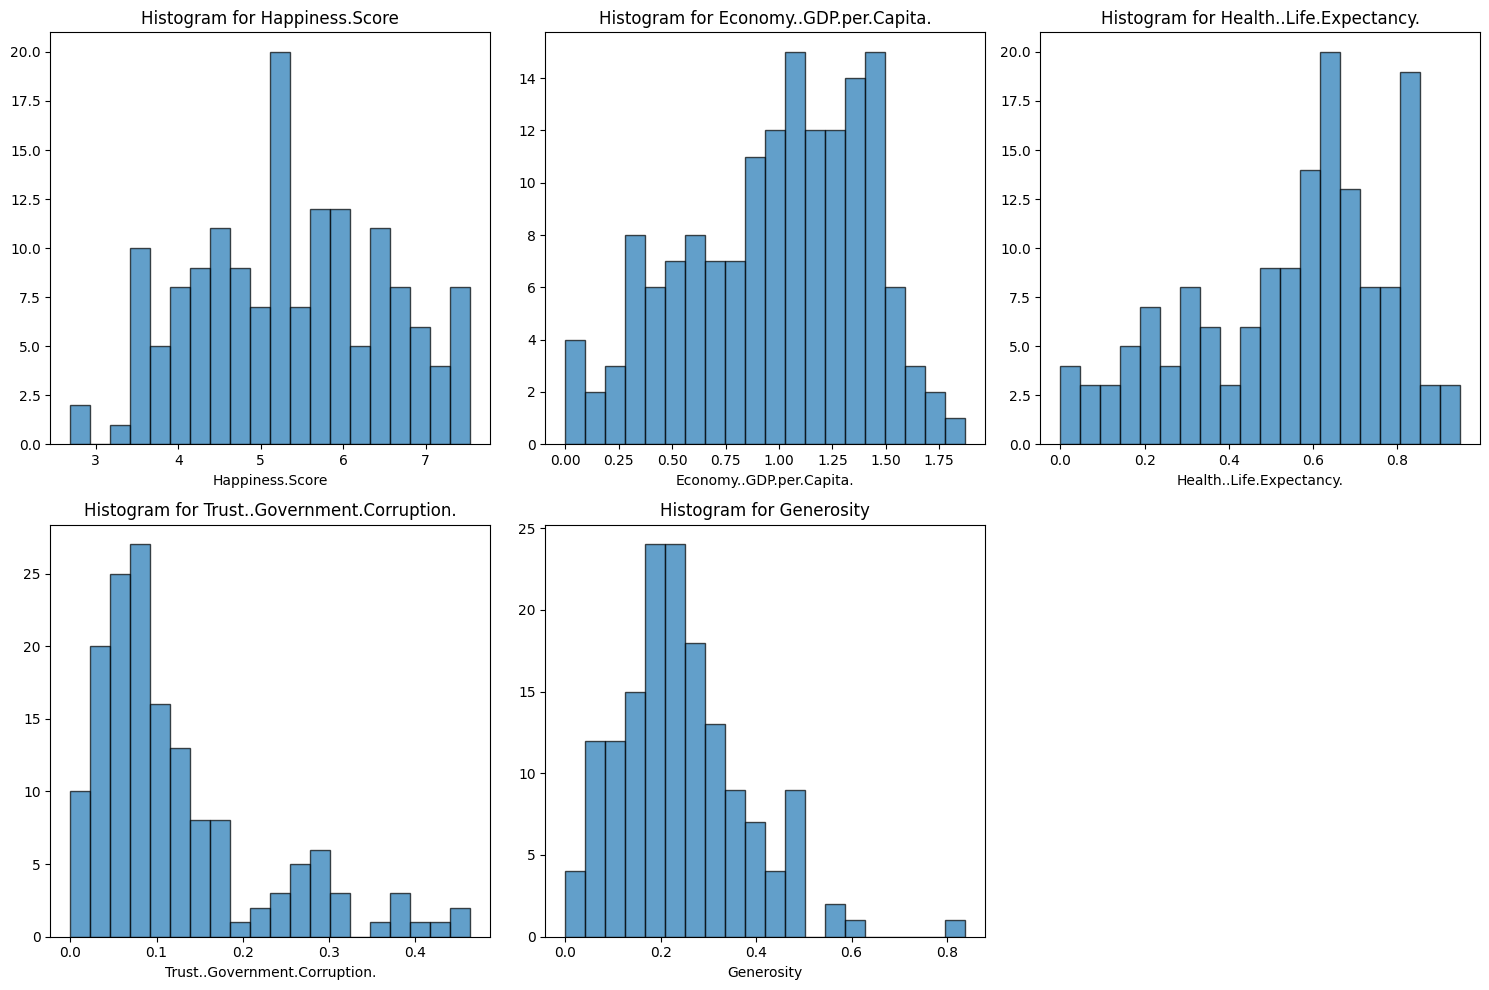

In [219]:
columns = [
    "Happiness.Score",
    "Economy..GDP.per.Capita.",
    "Health..Life.Expectancy.",
    "Trust..Government.Corruption.",
    "Generosity"
]

plt.figure(figsize=(15, 10))

# Plot a histogram for each selected column
for i, col in enumerate(columns):
    plt.subplot(2, 3, i+1)
    plt.hist(df_2017[col], bins=20, edgecolor='black', alpha=0.7)
    plt.title("Histogram for " + col)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

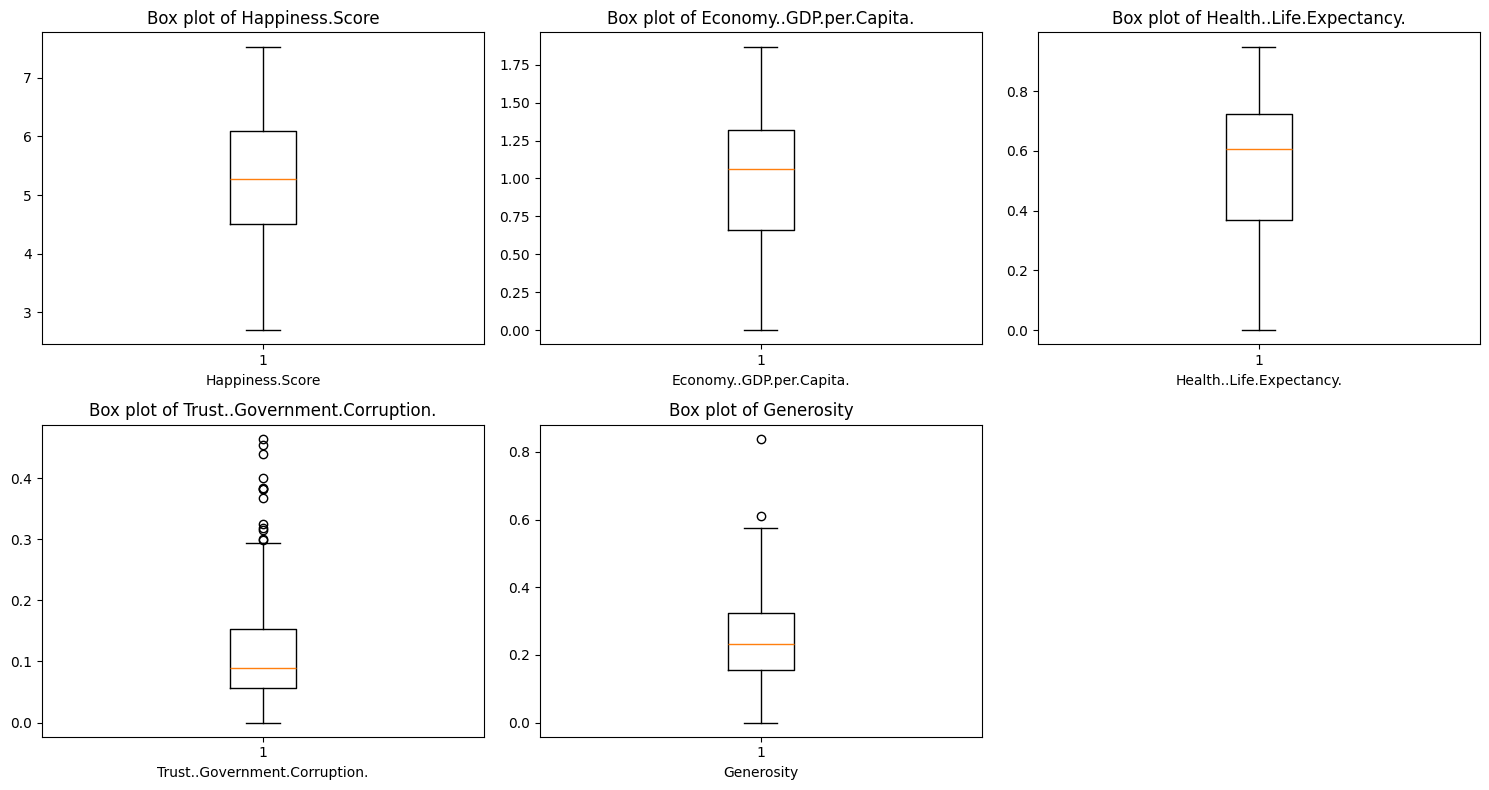

In [220]:
columns = [
    "Happiness.Score",
    "Economy..GDP.per.Capita.",
    "Health..Life.Expectancy.",
    "Trust..Government.Corruption.",
    "Generosity"
]

plt.figure(figsize=(15, 8))

# Create a box plot for each selected column in a 2x3 grid
for i, col in enumerate(columns):
    plt.subplot(2, 3, i+1)
    plt.boxplot(df_2017[col])
    plt.xlabel(col)
    plt.title("Box plot of " + col)

# Hide the unused subplot if there is one
if len(columns) < 6:
    plt.subplot(2, 3, len(columns)+1).axis('off')

plt.tight_layout()
plt.show()

#### 2018

In [221]:
df_2018.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  
0                      0.393  
1                      0.340  
2                      0.408  
3                      0.138  
4                      0.357

In [222]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [223]:
# Histograms are plotted for selected numerical columns from the 2018 happiness dataset
# to analyze their distributions and check for potential outliers
# The chosen columns are:
# - Score: A key metric; understanding its distribution is essential
# - GDP per capita: Likely to reveal economic disparities or outliers
# - Healthy life expectancy: Useful for spotting outliers in life expectancy
# - Generosity: Likely to have a skewed distribution or potential outliers
# - Perceptions of corruption: May reveal extreme values

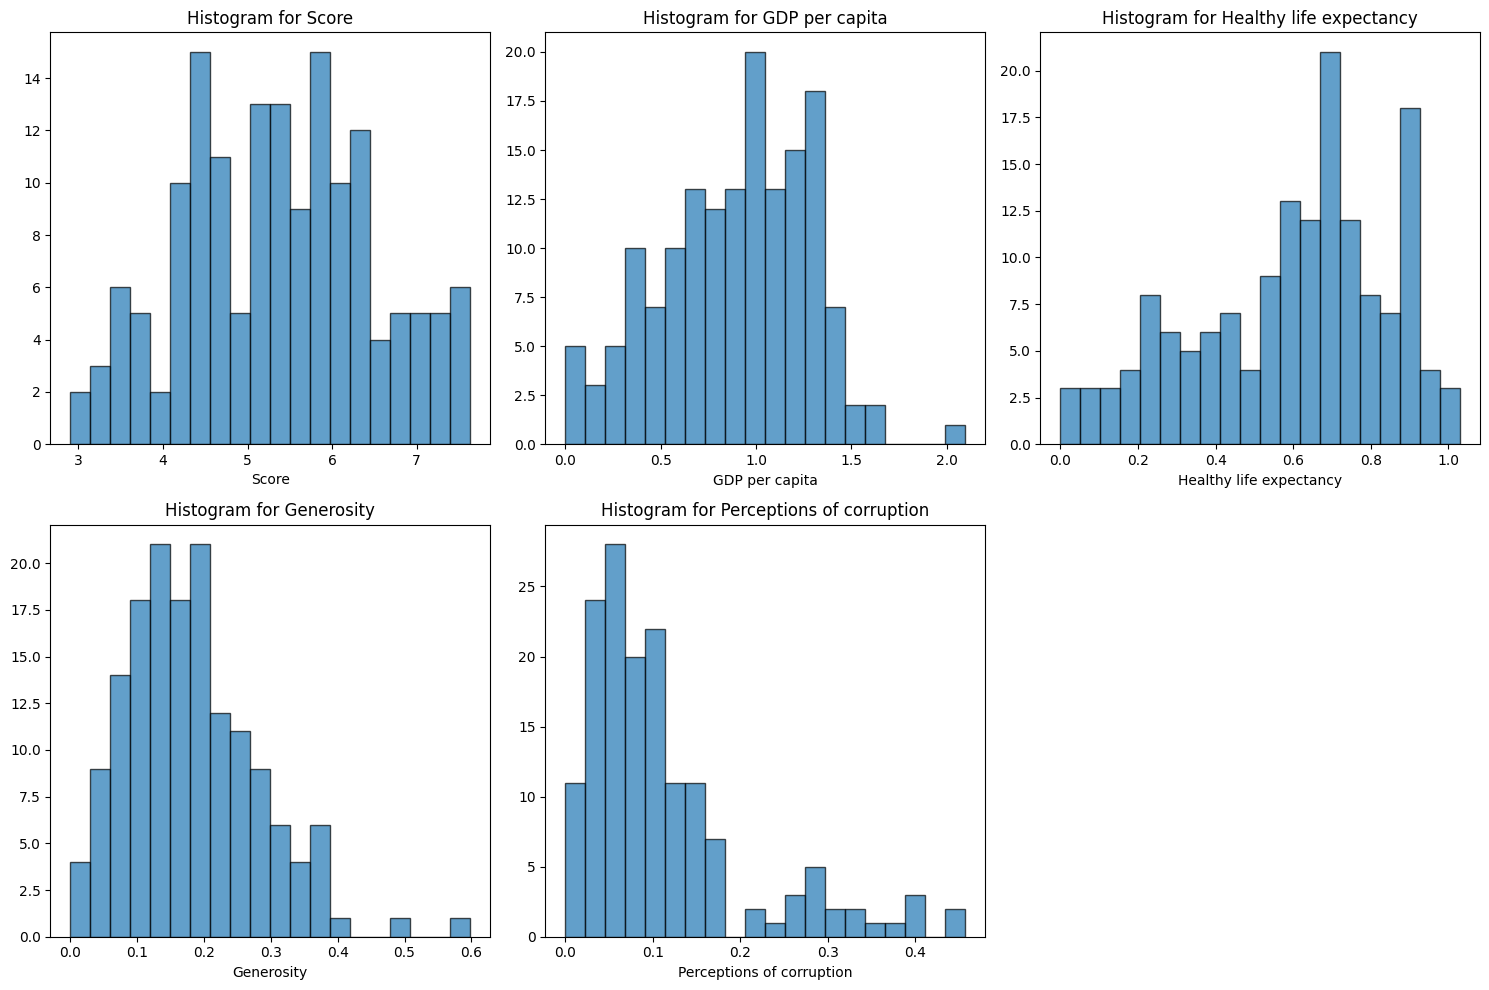

In [224]:
columns = [
    "Score",
    "GDP per capita",
    "Healthy life expectancy",
    "Generosity",
    "Perceptions of corruption"
]

plt.figure(figsize=(15, 10))

# Plot a histogram for each selected column
for i, col in enumerate(columns):
    plt.subplot(2, 3, i+1)
    plt.hist(df_2018[col], bins=20, edgecolor='black', alpha=0.7)
    plt.title("Histogram for " + col)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

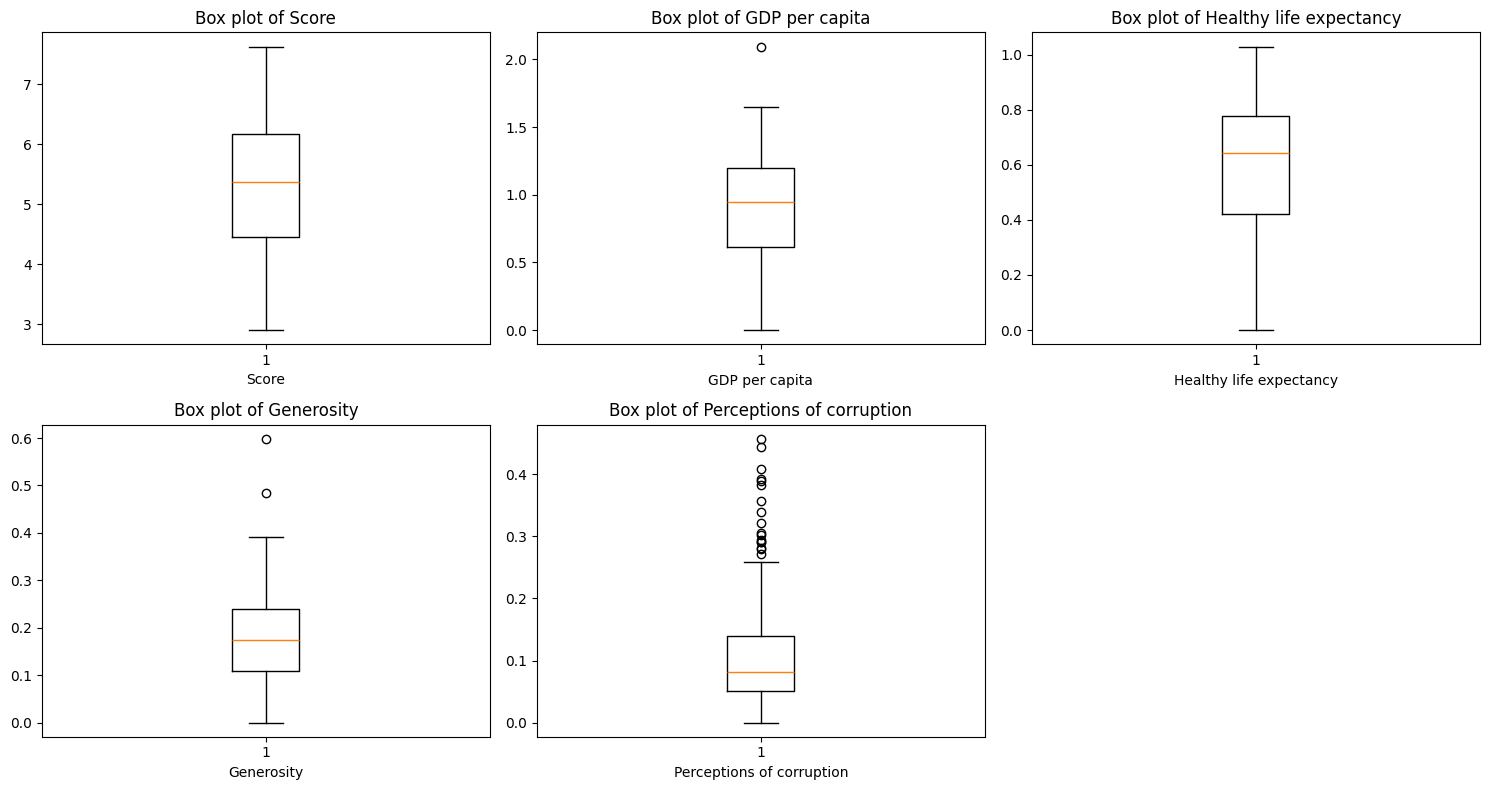

In [225]:
columns = [
    "Score",
    "GDP per capita",
    "Healthy life expectancy",
    "Generosity",
    "Perceptions of corruption"
]

plt.figure(figsize=(15, 8))

# Create a box plot for each selected column in a 2x3 grid layout
for i, col in enumerate(columns):
    plt.subplot(2, 3, i+1)
    plt.boxplot(df_2018[col])
    plt.xlabel(col)
    plt.title("Box plot of " + col)

# Hide the unused subplot if there is one
if len(columns) < 6:
    plt.subplot(2, 3, len(columns)+1).axis('off')

plt.tight_layout()
plt.show()

#### 2019

In [226]:
df_2019.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

In [227]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [228]:
# Histograms are plotted for selected numerical columns from the 2019 happiness dataset
# to analyze their distributions and check for potential outliers
# The chosen columns are:
# - Score: A key metric; understanding its distribution is essential
# - GDP per capita: Likely to reveal economic disparities or outliers
# - Healthy life expectancy: Useful for spotting outliers in life expectancy
# - Generosity: Likely to have a skewed distribution or potential outliers
# - Perceptions of corruption: May reveal extreme values

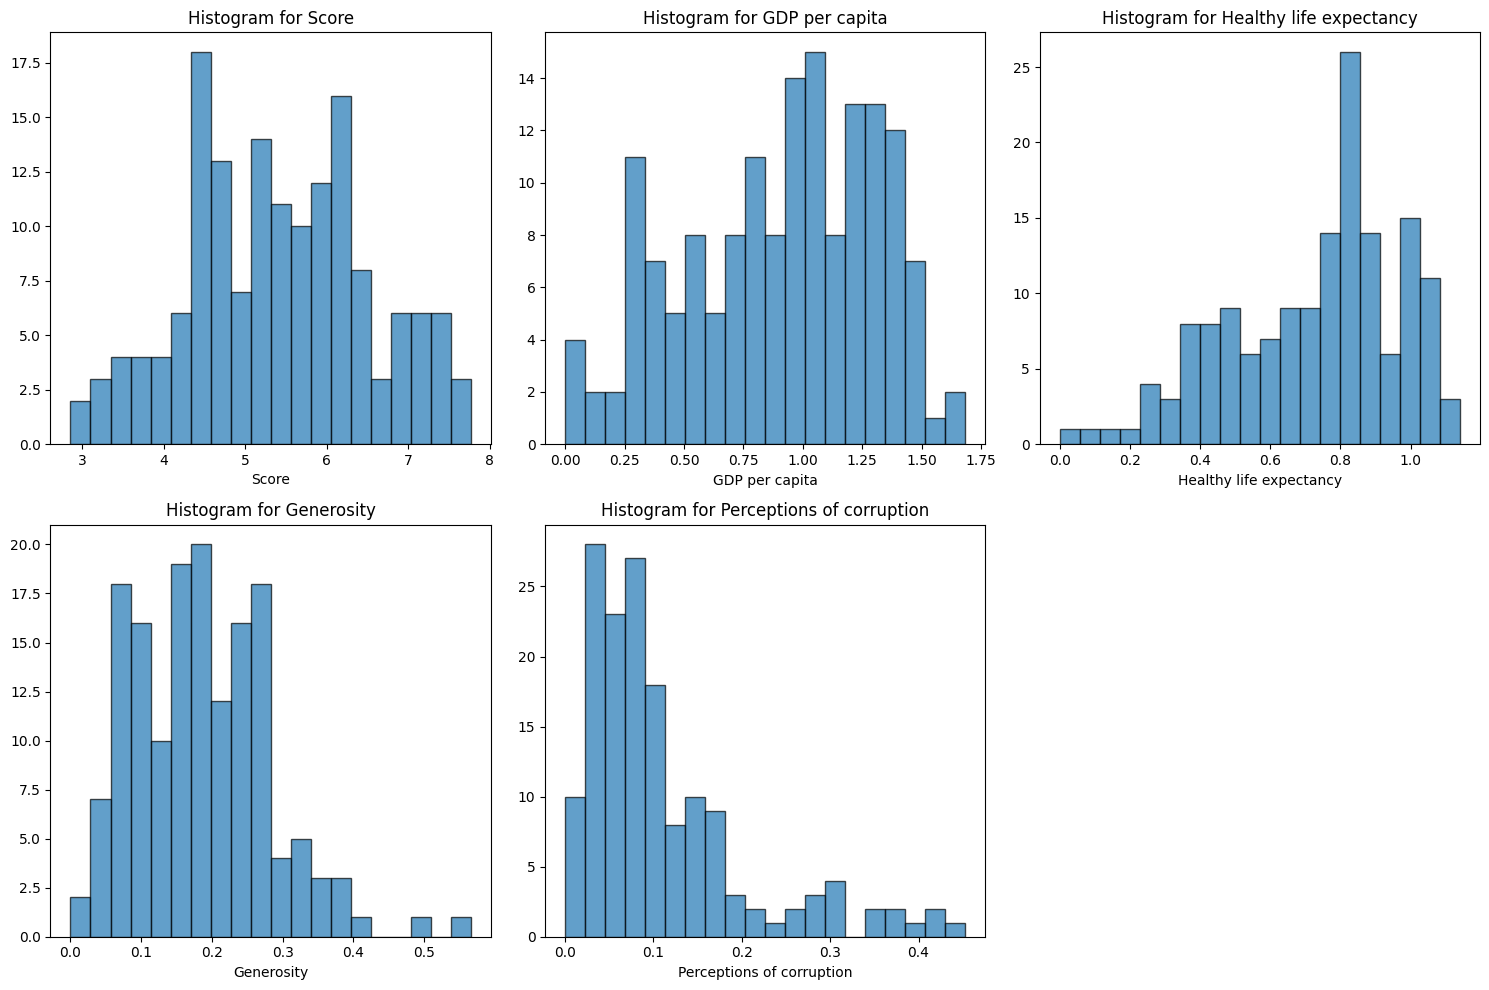

In [229]:
columns = [
    "Score",
    "GDP per capita",
    "Healthy life expectancy",
    "Generosity",
    "Perceptions of corruption"
]

plt.figure(figsize=(15, 10))

for i, col in enumerate(columns):
    plt.subplot(2, 3, i+1)
    plt.hist(df_2019[col], bins=20, edgecolor='black', alpha=0.7)
    plt.title("Histogram for " + col)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

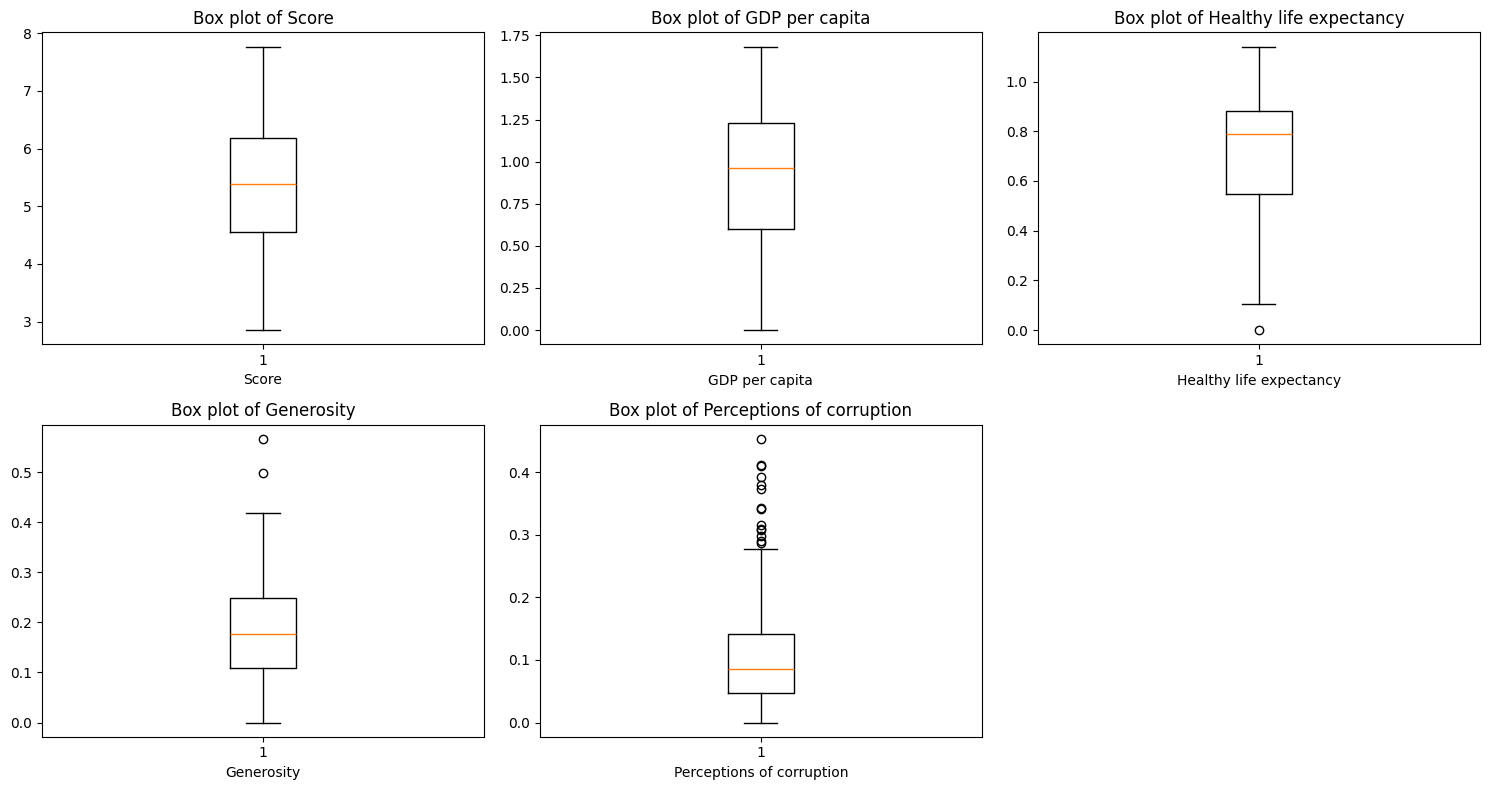

In [230]:
columns = [
    "Score",
    "GDP per capita",
    "Healthy life expectancy",
    "Generosity",
    "Perceptions of corruption"
]

plt.figure(figsize=(15, 8))

# Create a box plot for each selected column in a 2x3 grid layout
for i, col in enumerate(columns):
    plt.subplot(2, 3, i+1)
    plt.boxplot(df_2019[col])
    plt.xlabel(col)
    plt.title("Box plot of " + col)

# Hide the unused subplot if there is one
if len(columns) < 6:
    plt.subplot(2, 3, len(columns)+1).axis('off')

plt.tight_layout()
plt.show()

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [231]:
df_2015.describe().T

count       mean        std      min  \
Happiness Rank                 158.0  79.493671  45.754363  1.00000   
Happiness Score                158.0   5.375734   1.145010  2.83900   
Standard Error                 158.0   0.047885   0.017146  0.01848   
Economy (GDP per Capita)       158.0   0.846137   0.403121  0.00000   
Family                         158.0   0.991046   0.272369  0.00000   
Health (Life Expectancy)       158.0   0.630259   0.247078  0.00000   
Freedom                        158.0   0.428615   0.150693  0.00000   
Trust (Government Corruption)  158.0   0.143422   0.120034  0.00000   
Generosity                     158.0   0.237296   0.126685  0.00000   
Dystopia Residual              158.0   2.098977   0.553550  0.32858   

                                     25%        50%         75%        max  
Happiness Rank                 40.250000  79.500000  118.750000  158.00000  
Happiness Score                 4.526000   5.232500    6.243750    7.58700  
Standard Error                  0.037268   0.043940    0.052300    0.13693  
Economy (GDP per Capita)        0.545808   0.910245    1.158448    1.69042  
Family                          0.856823   1.029510    1.214405    1.40223  
Health (Life Expectancy)        0.439185   0.696705    0.811013    1.02525  
Freedom                         0.328330   0.435515    0.549092    0.66973  
Trust (Government Corruption)   0.061675   0.107220    0.180255    0.55191  
Generosity                      0.150553   0.216130    0.309883    0.79588  
Dystopia Residual               1.759410   2.095415    2.462415    3.60214

In [232]:
df_2016.describe().T

count       mean        std      min       25%  \
Happiness Rank                 157.0  78.980892  45.466030  1.00000  40.00000   
Happiness Score                157.0   5.382185   1.141674  2.90500   4.40400   
Lower Confidence Interval      157.0   5.282395   1.148043  2.73200   4.32700   
Upper Confidence Interval      157.0   5.481975   1.136493  3.07800   4.46500   
Economy (GDP per Capita)       157.0   0.953880   0.412595  0.00000   0.67024   
Family                         157.0   0.793621   0.266706  0.00000   0.64184   
Health (Life Expectancy)       157.0   0.557619   0.229349  0.00000   0.38291   
Freedom                        157.0   0.370994   0.145507  0.00000   0.25748   
Trust (Government Corruption)  157.0   0.137624   0.111038  0.00000   0.06126   
Generosity                     157.0   0.242635   0.133756  0.00000   0.15457   
Dystopia Residual              157.0   2.325807   0.542220  0.81789   2.03171   

                                    50%        75%        max  
Happiness Rank                 79.00000  118.00000  157.00000  
Happiness Score                 5.31400    6.26900    7.52600  
Lower Confidence Interval       5.23700    6.15400    7.46000  
Upper Confidence Interval       5.41900    6.43400    7.66900  
Economy (GDP per Capita)        1.02780    1.27964    1.82427  
Family                          0.84142    1.02152    1.18326  
Health (Life Expectancy)        0.59659    0.72993    0.95277  
Freedom                         0.39747    0.48453    0.60848  
Trust (Government Corruption)   0.10547    0.17554    0.50521  
Generosity                      0.22245    0.31185    0.81971  
Dystopia Residual               2.29074    2.66465    3.83772

In [233]:
df_2017.describe().T

count       mean        std       min  \
Happiness.Rank                 155.0  78.000000  44.888751  1.000000   
Happiness.Score                155.0   5.354019   1.131230  2.693000   
Whisker.high                   155.0   5.452326   1.118542  2.864884   
Whisker.low                    155.0   5.255713   1.145030  2.521116   
Economy..GDP.per.Capita.       155.0   0.984718   0.420793  0.000000   
Family                         155.0   1.188898   0.287263  0.000000   
Health..Life.Expectancy.       155.0   0.551341   0.237073  0.000000   
Freedom                        155.0   0.408786   0.149997  0.000000   
Generosity                     155.0   0.246883   0.134780  0.000000   
Trust..Government.Corruption.  155.0   0.123120   0.101661  0.000000   
Dystopia.Residual              155.0   1.850238   0.500028  0.377914   

                                     25%        50%         75%         max  
Happiness.Rank                 39.500000  78.000000  116.500000  155.000000  
Happiness.Score                 4.505500   5.279000    6.101500    7.537000  
Whisker.high                    4.608172   5.370032    6.194600    7.622030  
Whisker.low                     4.374955   5.193152    6.006527    7.479556  
Economy..GDP.per.Capita.        0.663371   1.064578    1.318027    1.870766  
Family                          1.042635   1.253918    1.414316    1.610574  
Health..Life.Expectancy.        0.369866   0.606042    0.723008    0.949492  
Freedom                         0.303677   0.437454    0.516561    0.658249  
Generosity                      0.154106   0.231538    0.323762    0.838075  
Trust..Government.Corruption.   0.057271   0.089848    0.153296    0.464308  
Dystopia.Residual               1.591291   1.832910    2.144654    3.117485

In [234]:
df_2018.describe().T

count       mean        std    min       25%  \
Overall rank                  156.0  78.500000  45.177428  1.000  39.75000   
Score                         156.0   5.375917   1.119506  2.905   4.45375   
GDP per capita                156.0   0.891449   0.391921  0.000   0.61625   
Social support                156.0   1.213237   0.302372  0.000   1.06675   
Healthy life expectancy       156.0   0.597346   0.247579  0.000   0.42225   
Freedom to make life choices  156.0   0.454506   0.162424  0.000   0.35600   
Generosity                    156.0   0.181006   0.098471  0.000   0.10950   
Perceptions of corruption     156.0   0.112905   0.096843  0.000   0.05100   

                                  50%        75%      max  
Overall rank                  78.5000  117.25000  156.000  
Score                          5.3780    6.16850    7.632  
GDP per capita                 0.9495    1.19775    2.096  
Social support                 1.2550    1.46300    1.644  
Healthy life expectancy        0.6440    0.77725    1.030  
Freedom to make life choices   0.4870    0.57850    0.724  
Generosity                     0.1740    0.23900    0.598  
Perceptions of corruption      0.0820    0.13900    0.457

In [235]:
df_2019.describe().T

count       mean        std    min       25%  \
Overall rank                  156.0  78.500000  45.177428  1.000  39.75000   
Score                         156.0   5.407096   1.113120  2.853   4.54450   
GDP per capita                156.0   0.905147   0.398389  0.000   0.60275   
Social support                156.0   1.208814   0.299191  0.000   1.05575   
Healthy life expectancy       156.0   0.725244   0.242124  0.000   0.54775   
Freedom to make life choices  156.0   0.392571   0.143289  0.000   0.30800   
Generosity                    156.0   0.184846   0.095254  0.000   0.10875   
Perceptions of corruption     156.0   0.110603   0.094538  0.000   0.04700   

                                  50%        75%      max  
Overall rank                  78.5000  117.25000  156.000  
Score                          5.3795    6.18450    7.769  
GDP per capita                 0.9600    1.23250    1.684  
Social support                 1.2715    1.45250    1.624  
Healthy life expectancy        0.7890    0.88175    1.141  
Freedom to make life choices   0.4170    0.50725    0.631  
Generosity                     0.1775    0.24825    0.566  
Perceptions of corruption      0.0855    0.14125    0.453

In [236]:
df_2015.describe(include='object').T

count unique          top freq
Country   158    158  Switzerland    1

In [237]:
df_2016.describe(include='object').T

count unique      top freq
Country   157    157  Denmark    1

In [238]:
df_2017.describe(include='object').T

count unique     top freq
Country   155    155  Norway    1

In [239]:
df_2018.describe(include='object').T

count unique      top freq
Country or region   156    156  Finland    1

In [240]:
df_2019.describe(include='object').T

count unique      top freq
Country or region   156    156  Finland    1

In [241]:
print("Average Happiness Score in",
      "2015:", df_2015['Happiness Score'].mean(),
      "2016:", df_2016['Happiness Score'].mean(),
      "2017:", df_2017['Happiness.Score'].mean(),
      "2018:", df_2018['Score'].mean(),
      "2019:", df_2019['Score'].mean())

print("Standard deviation of Happiness Score in",
      "2015:", df_2015['Happiness Score'].std(),
      "2016:", df_2016['Happiness Score'].std(),
      "2017:", df_2017['Happiness.Score'].std(),
      "2018:", df_2018['Score'].std(),
      "2019:", df_2019['Score'].std())

Average Happiness Score in 2015: 5.375734177215189 2016: 5.382184713375795 2017: 5.354019355773926 2018: 5.375916666666667 2019: 5.407096153846155
Standard deviation of Happiness Score in 2015: 1.1450101349520665 2016: 1.1416735176005715 2017: 1.1312300899149939 2018: 1.119505852731943 2019: 1.1131198687956712


In [242]:
print("80th percentile for Happiness Score:")
print("2015:", np.quantile(df_2015['Happiness Score'], 0.80))
print("2016:", np.quantile(df_2016['Happiness Score'], 0.80))
print("2017:", np.quantile(df_2017['Happiness.Score'], 0.80))
print("2018:", np.quantile(df_2018['Score'], 0.80))
print("2019:", np.quantile(df_2019['Score'], 0.80))

80th percentile for Happiness Score:
2015: 6.481800000000001
2016: 6.4772
2017: 6.427599811553952
2018: 6.374
2019: 6.3


In [243]:
print("25th percentile for Happiness Score:")
print("2015:", df_2015['Happiness Score'].quantile(0.25))
print("2016:", df_2016['Happiness Score'].quantile(0.25))
print("2017:", df_2017['Happiness.Score'].quantile(0.25))
print("2018:", df_2018['Score'].quantile(0.25))
print("2019:", df_2019['Score'].quantile(0.25))

25th percentile for Happiness Score:
2015: 4.526
2016: 4.404
2017: 4.50550007820129
2018: 4.45375
2019: 4.5445


## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

In [244]:
# Since we only have a single categorical column these type of plots cannot be applied

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

#### 2015

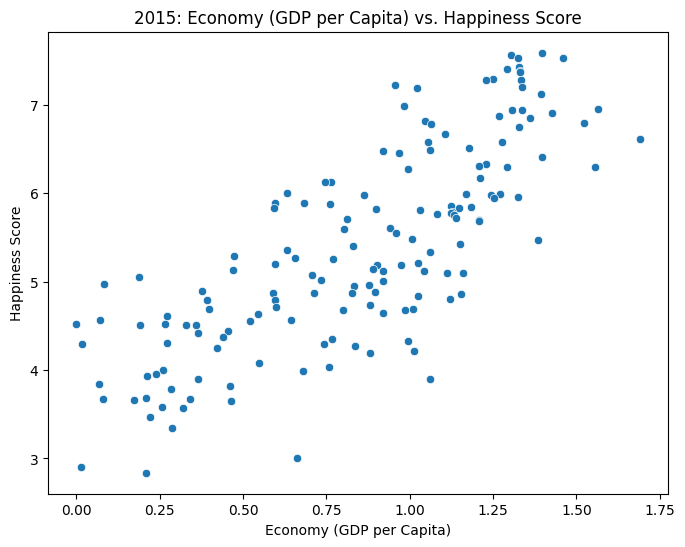

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_2015, x="Economy (GDP per Capita)", y="Happiness Score")
plt.title("2015: Economy (GDP per Capita) vs. Happiness Score")
plt.xlabel("Economy (GDP per Capita)")
plt.ylabel("Happiness Score")
plt.show()

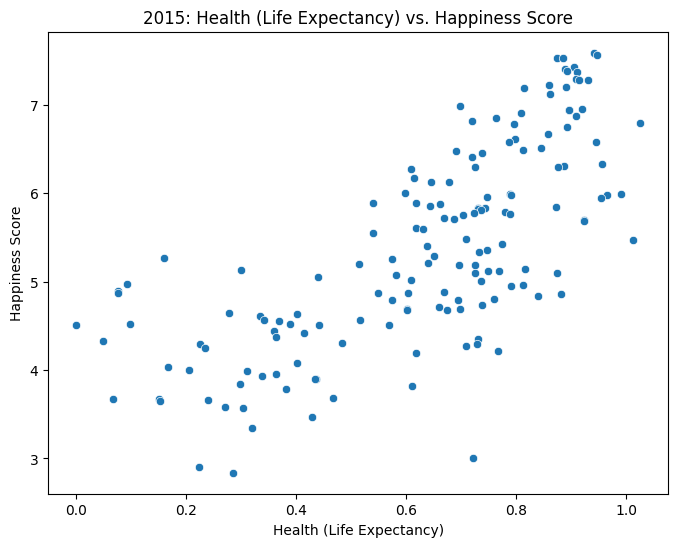

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_2015, x="Health (Life Expectancy)", y="Happiness Score")
plt.title("2015: Health (Life Expectancy) vs. Happiness Score")
plt.xlabel("Health (Life Expectancy)")
plt.ylabel("Happiness Score")
plt.show()

#### 2016

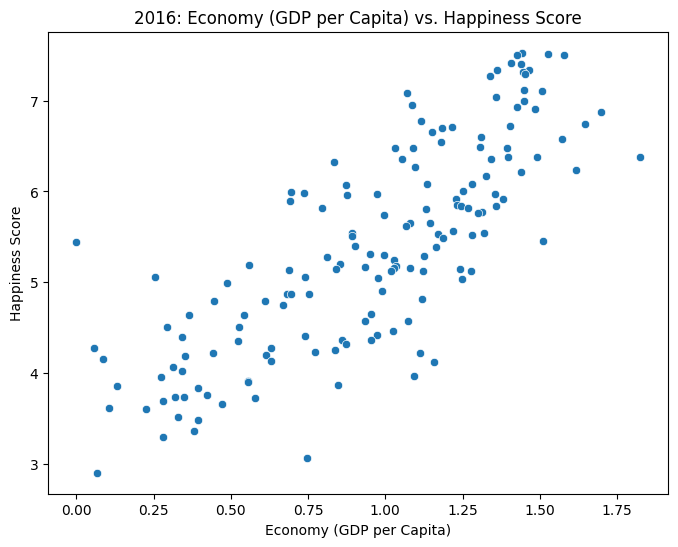

In [250]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_2016, x="Economy (GDP per Capita)", y="Happiness Score")
plt.title("2016: Economy (GDP per Capita) vs. Happiness Score")
plt.xlabel("Economy (GDP per Capita)")
plt.ylabel("Happiness Score")
plt.show()

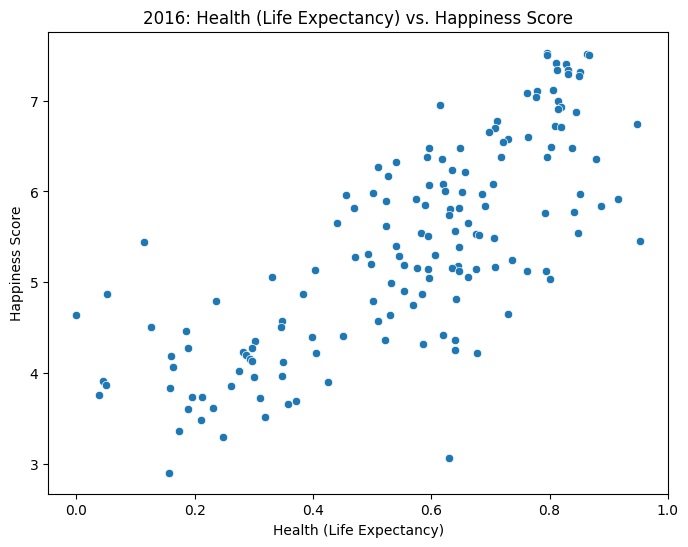

In [251]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_2016, x="Health (Life Expectancy)", y="Happiness Score")
plt.title("2016: Health (Life Expectancy) vs. Happiness Score")
plt.xlabel("Health (Life Expectancy)")
plt.ylabel("Happiness Score")
plt.show()

#### 2017

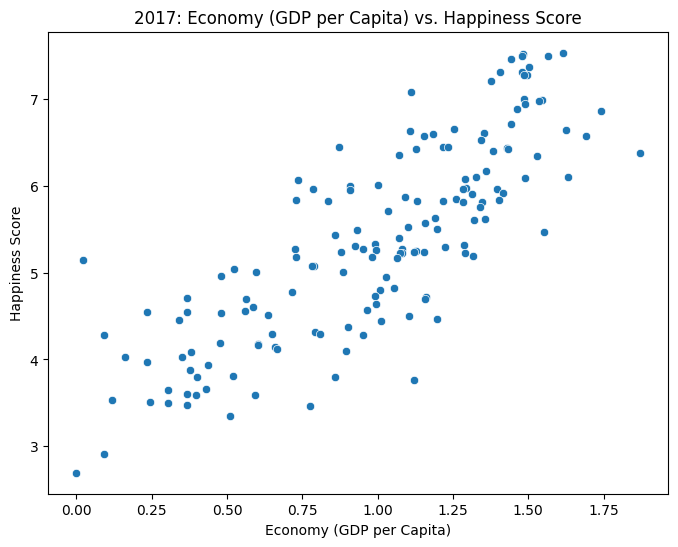

In [252]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_2017, x="Economy..GDP.per.Capita.", y="Happiness.Score")
plt.title("2017: Economy (GDP per Capita) vs. Happiness Score")
plt.xlabel("Economy (GDP per Capita)")
plt.ylabel("Happiness Score")
plt.show()

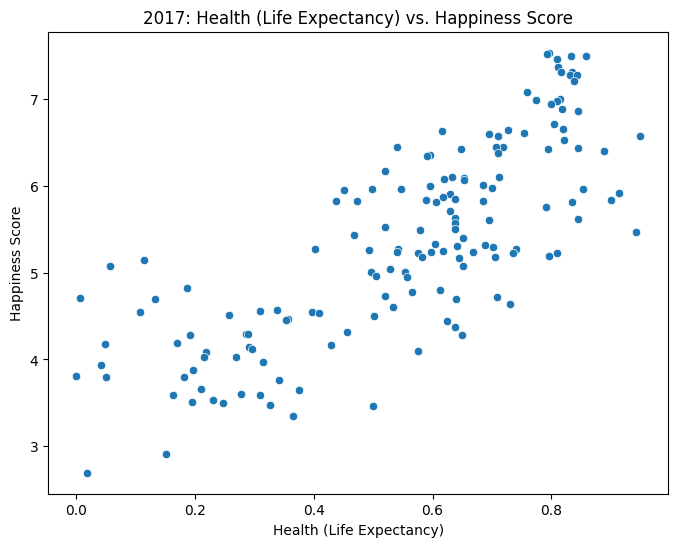

In [253]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_2017, x="Health..Life.Expectancy.", y="Happiness.Score")
plt.title("2017: Health (Life Expectancy) vs. Happiness Score")
plt.xlabel("Health (Life Expectancy)")
plt.ylabel("Happiness Score")
plt.show()

#### 2018

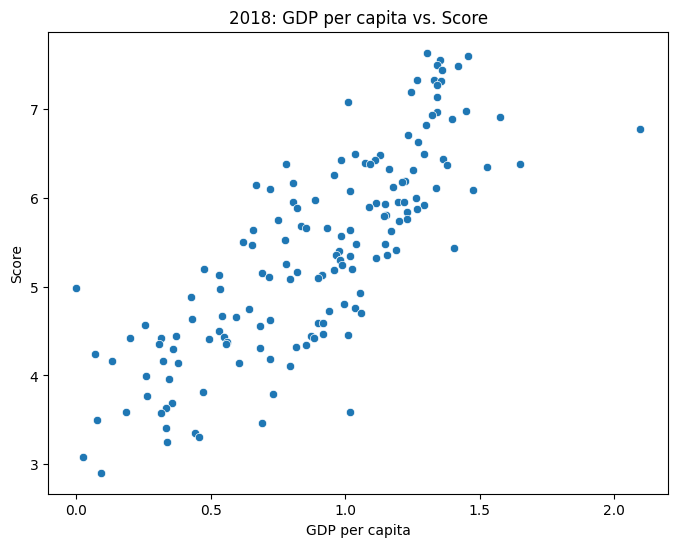

In [254]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_2018, x="GDP per capita", y="Score")
plt.title("2018: GDP per capita vs. Score")
plt.xlabel("GDP per capita")
plt.ylabel("Score")
plt.show()

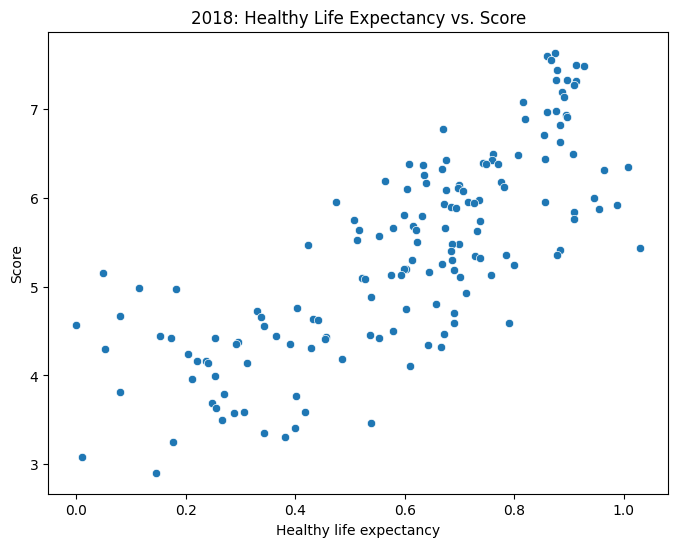

In [255]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_2018, x="Healthy life expectancy", y="Score")
plt.title("2018: Healthy Life Expectancy vs. Score")
plt.xlabel("Healthy life expectancy")
plt.ylabel("Score")
plt.show()

#### 2019

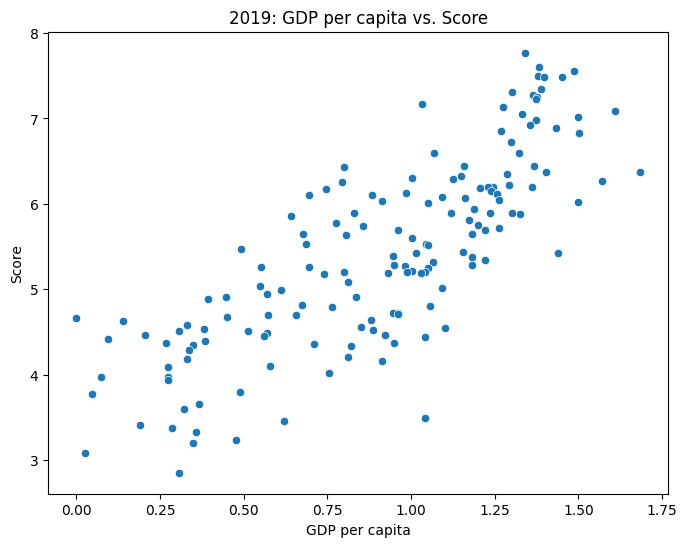

In [256]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_2019, x="GDP per capita", y="Score")
plt.title("2019: GDP per capita vs. Score")
plt.xlabel("GDP per capita")
plt.ylabel("Score")
plt.show()

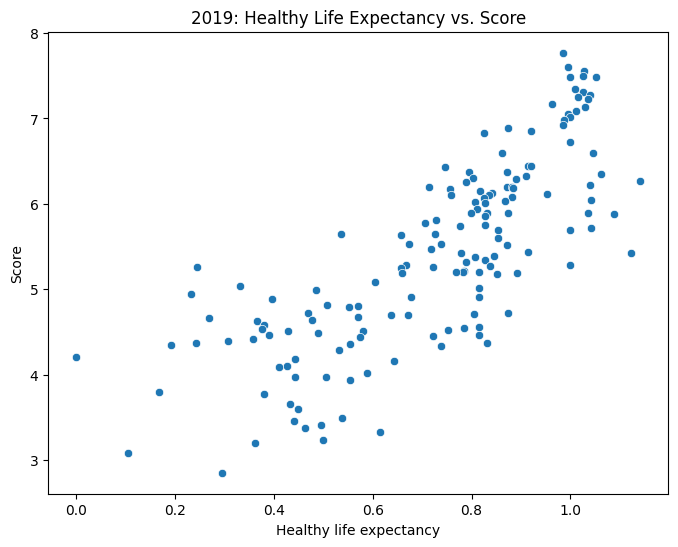

In [257]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_2019, x="Healthy life expectancy", y="Score")
plt.title("2019: Healthy Life Expectancy vs. Score")
plt.xlabel("Healthy life expectancy")
plt.ylabel("Score")
plt.show()

## We could also use a correlation matrix to get more specific information about the relationship between these two variables.

#### 2015

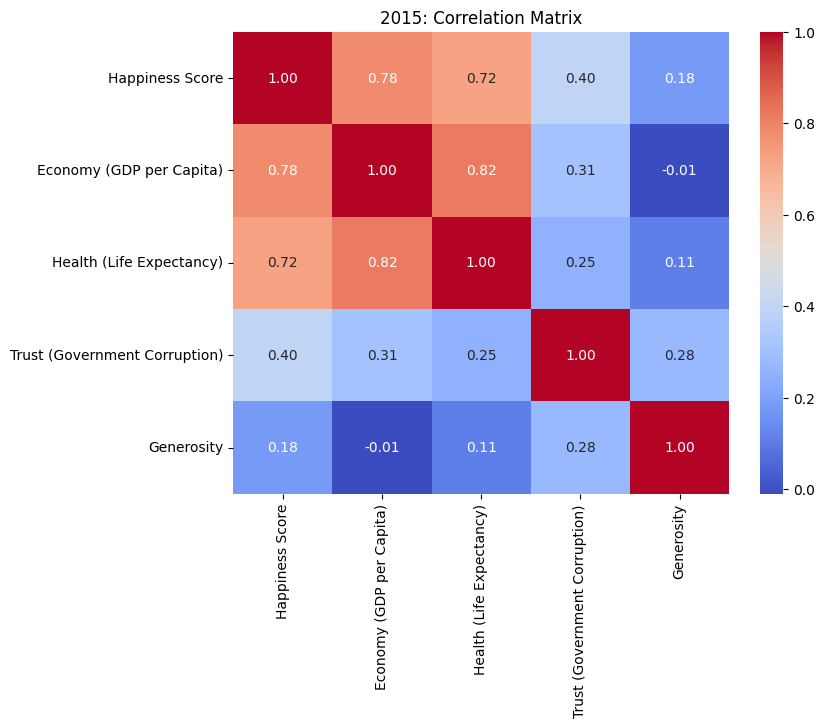

In [248]:
cols_2015 = ["Happiness Score", "Economy (GDP per Capita)", "Health (Life Expectancy)",
             "Trust (Government Corruption)", "Generosity"]
corr_2015 = df_2015[cols_2015].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_2015, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("2015: Correlation Matrix")
plt.show()

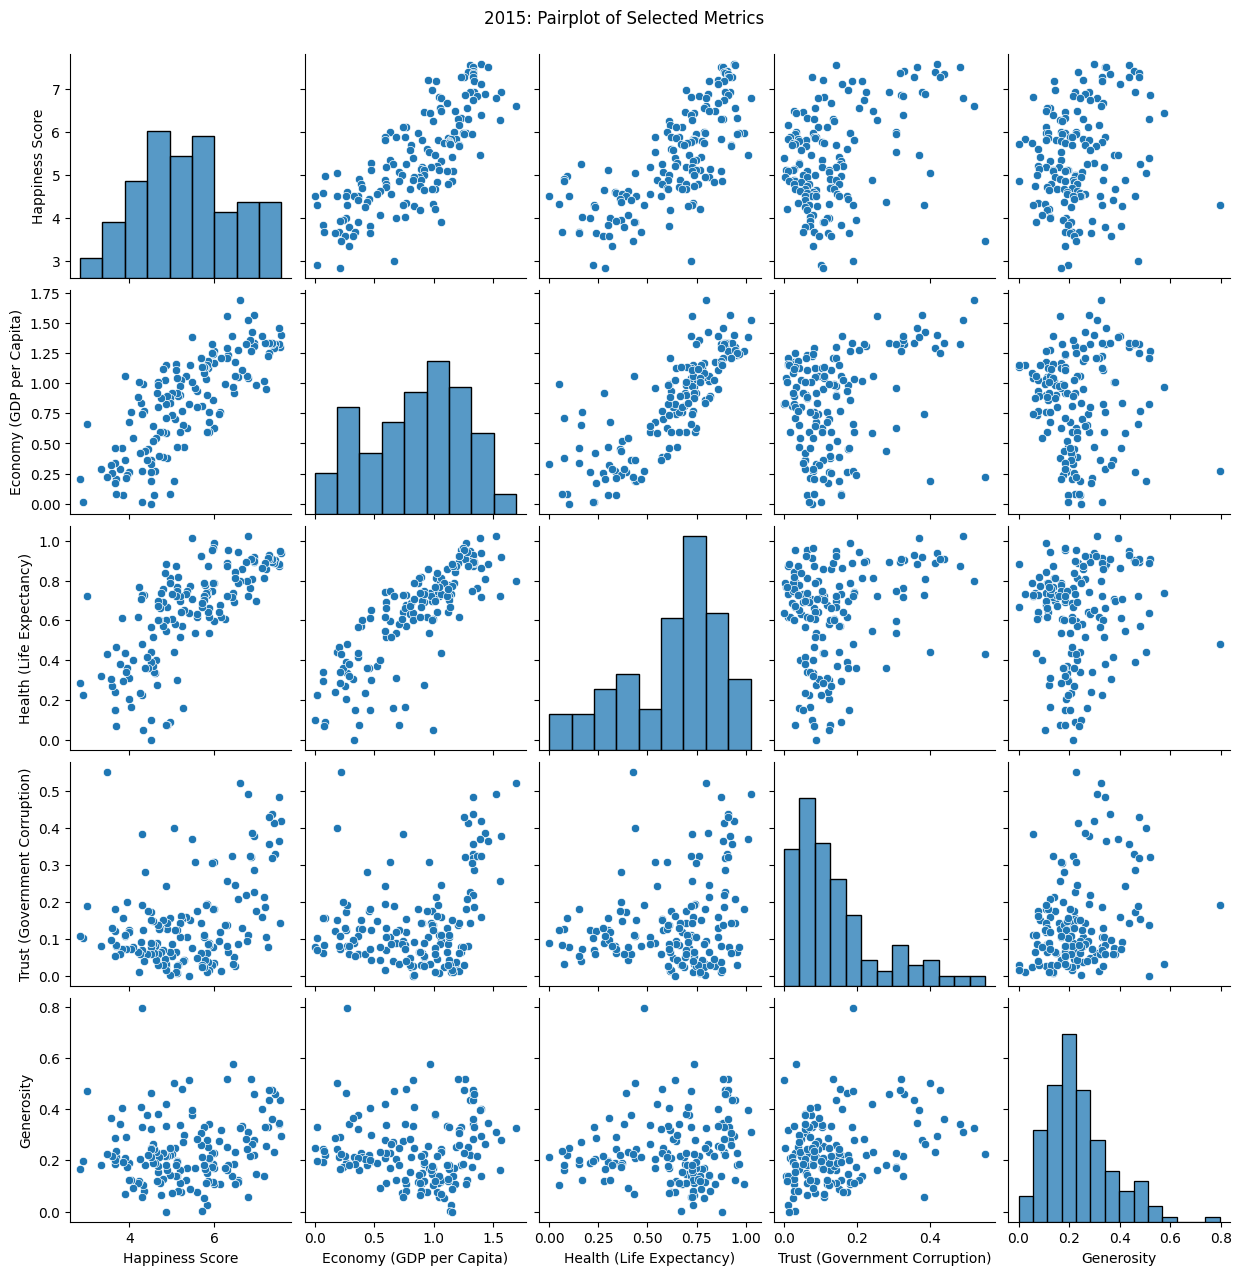

In [249]:
sns.pairplot(df_2015[cols_2015])
plt.suptitle("2015: Pairplot of Selected Metrics", y=1.02)
plt.show()

#### 2016

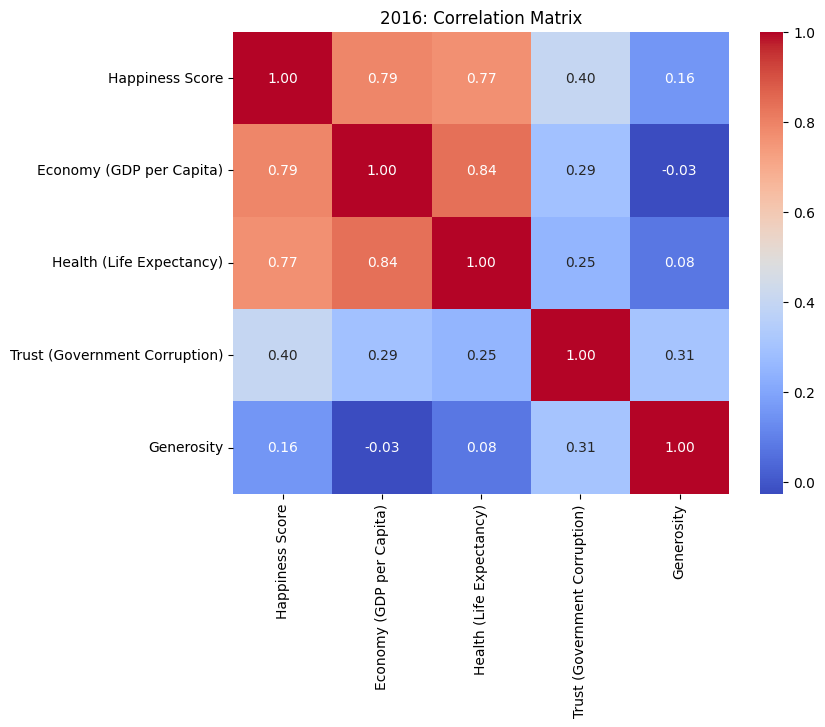

In [258]:
cols_2016 = ["Happiness Score", "Economy (GDP per Capita)", "Health (Life Expectancy)",
             "Trust (Government Corruption)", "Generosity"]
corr_2016 = df_2016[cols_2016].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_2016, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("2016: Correlation Matrix")
plt.show()

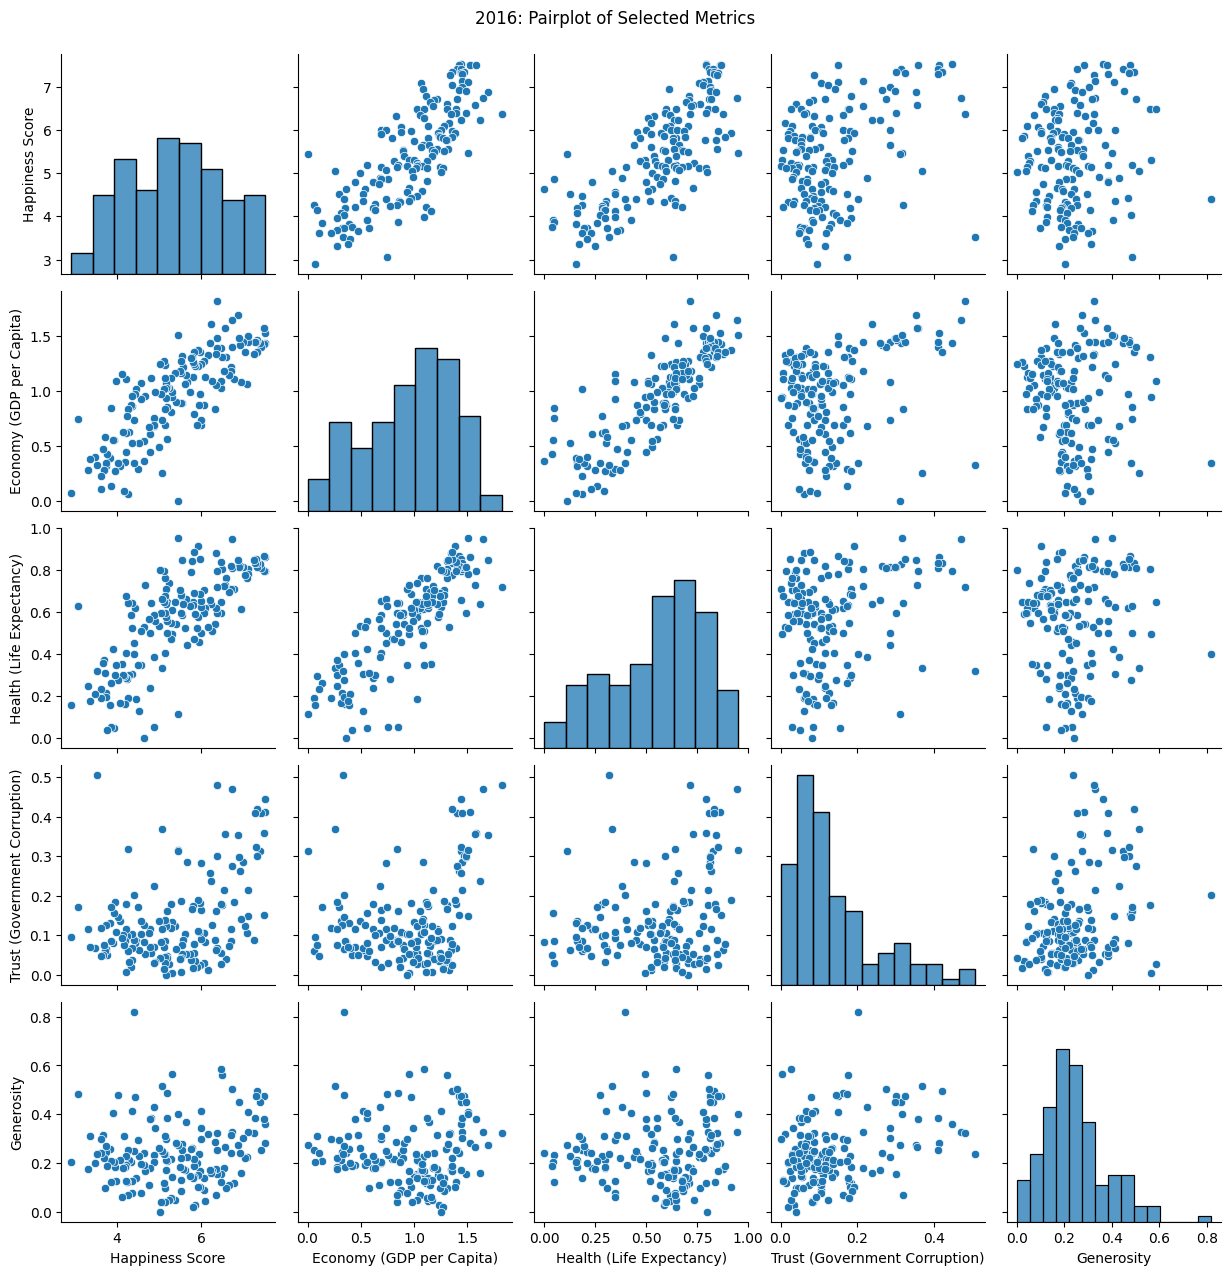

In [259]:
sns.pairplot(df_2016[cols_2016])
plt.suptitle("2016: Pairplot of Selected Metrics", y=1.02)
plt.show()

#### 2017

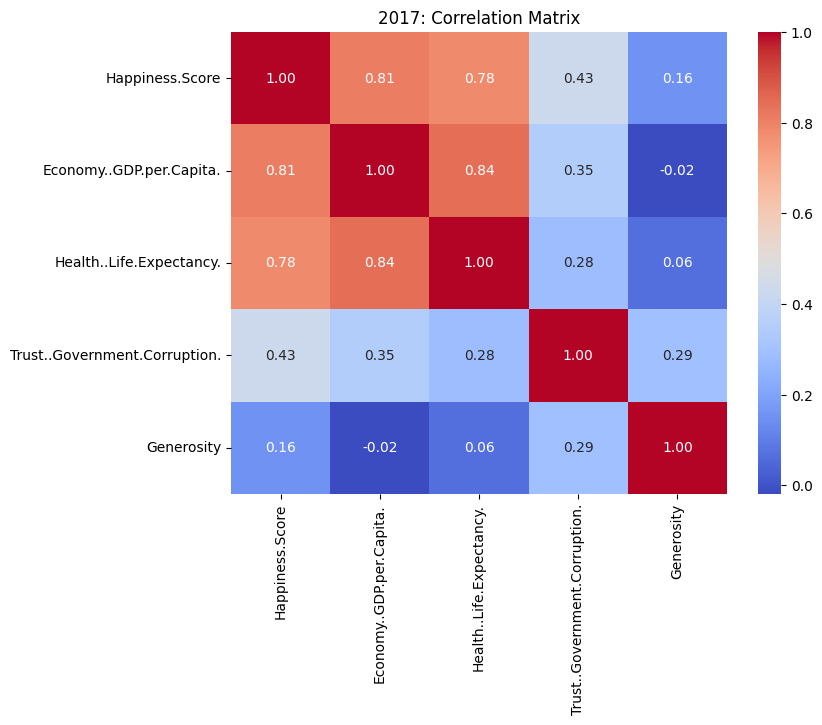

In [260]:
cols_2017 = ["Happiness.Score", "Economy..GDP.per.Capita.", "Health..Life.Expectancy.",
             "Trust..Government.Corruption.", "Generosity"]
corr_2017 = df_2017[cols_2017].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_2017, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("2017: Correlation Matrix")
plt.show()


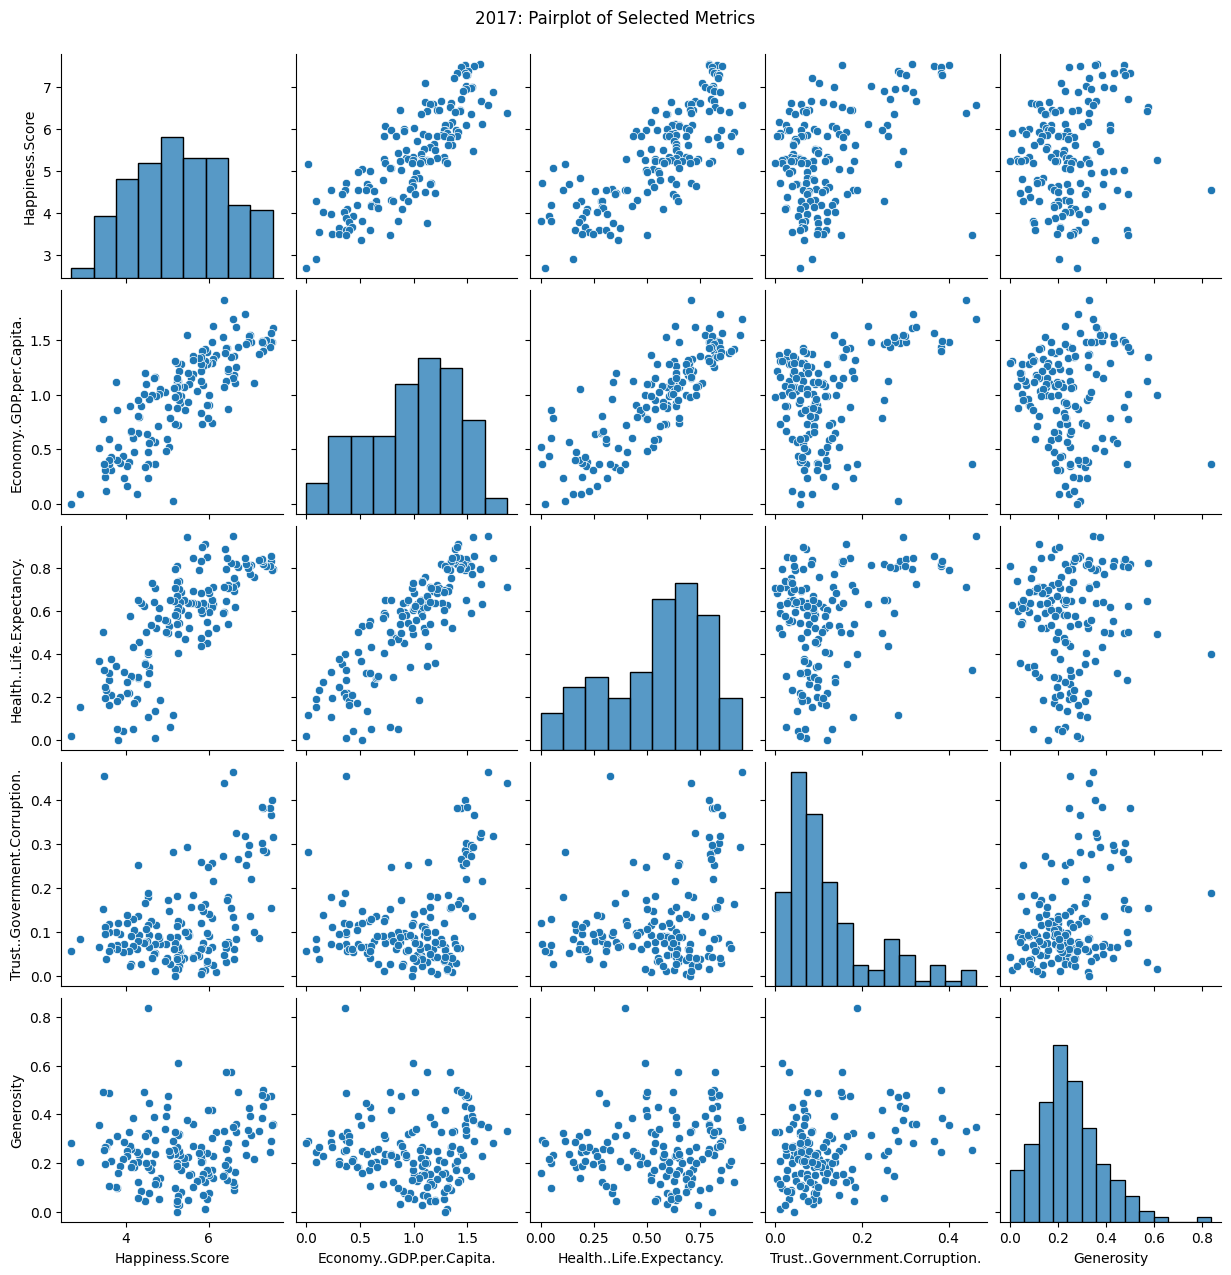

In [261]:
sns.pairplot(df_2017[cols_2017])
plt.suptitle("2017: Pairplot of Selected Metrics", y=1.02)
plt.show()

#### 2018

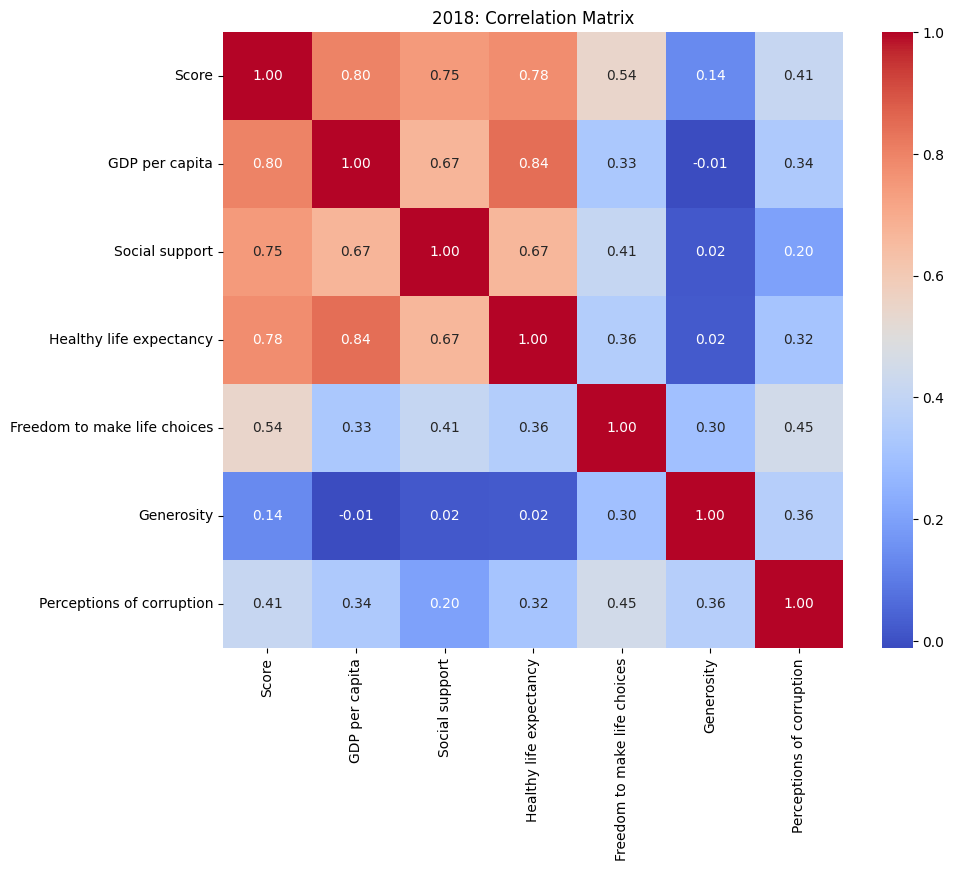

In [262]:
cols_2018 = ["Score", "GDP per capita", "Social support", "Healthy life expectancy",
             "Freedom to make life choices", "Generosity", "Perceptions of corruption"]
corr_2018 = df_2018[cols_2018].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_2018, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("2018: Correlation Matrix")
plt.show()


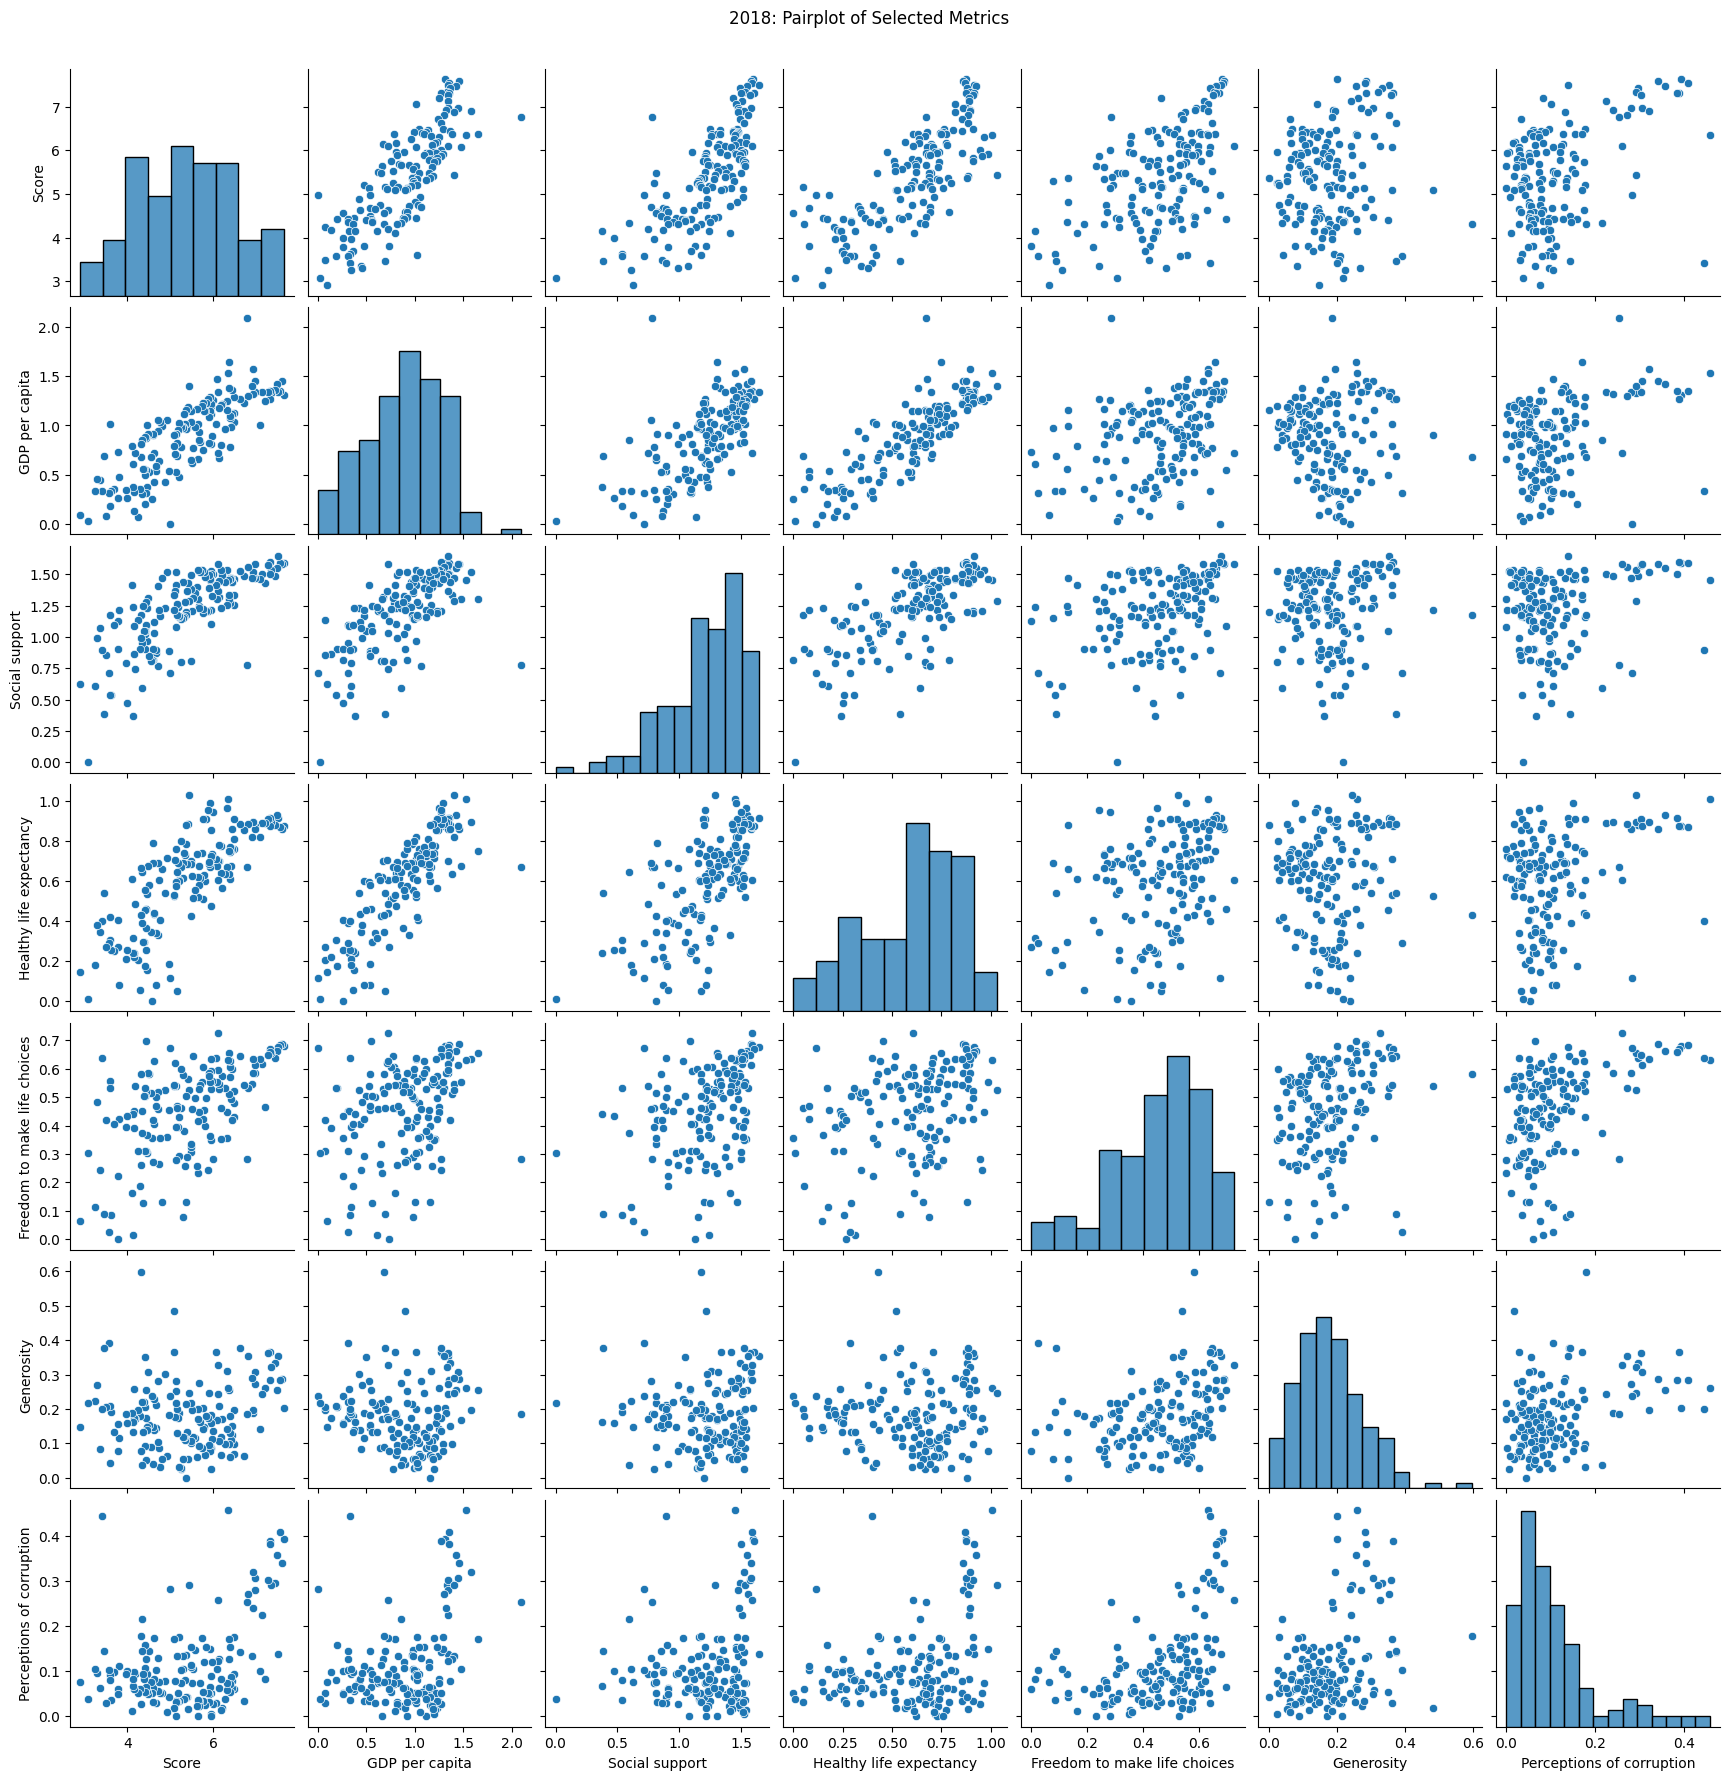

In [263]:
sns.pairplot(df_2018[cols_2018])
plt.suptitle("2018: Pairplot of Selected Metrics", y=1.02)
plt.show()

#### 2019

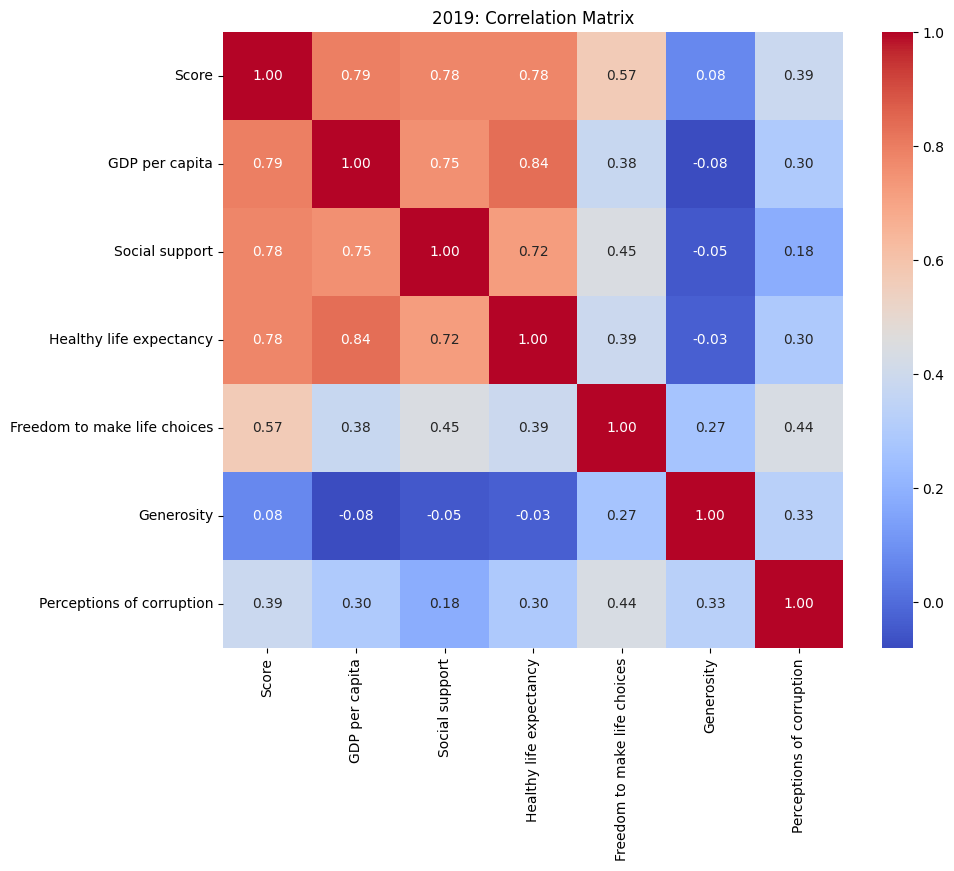

In [264]:
cols_2019 = ["Score", "GDP per capita", "Social support", "Healthy life expectancy",
             "Freedom to make life choices", "Generosity", "Perceptions of corruption"]
corr_2019 = df_2019[cols_2019].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_2019, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("2019: Correlation Matrix")
plt.show()

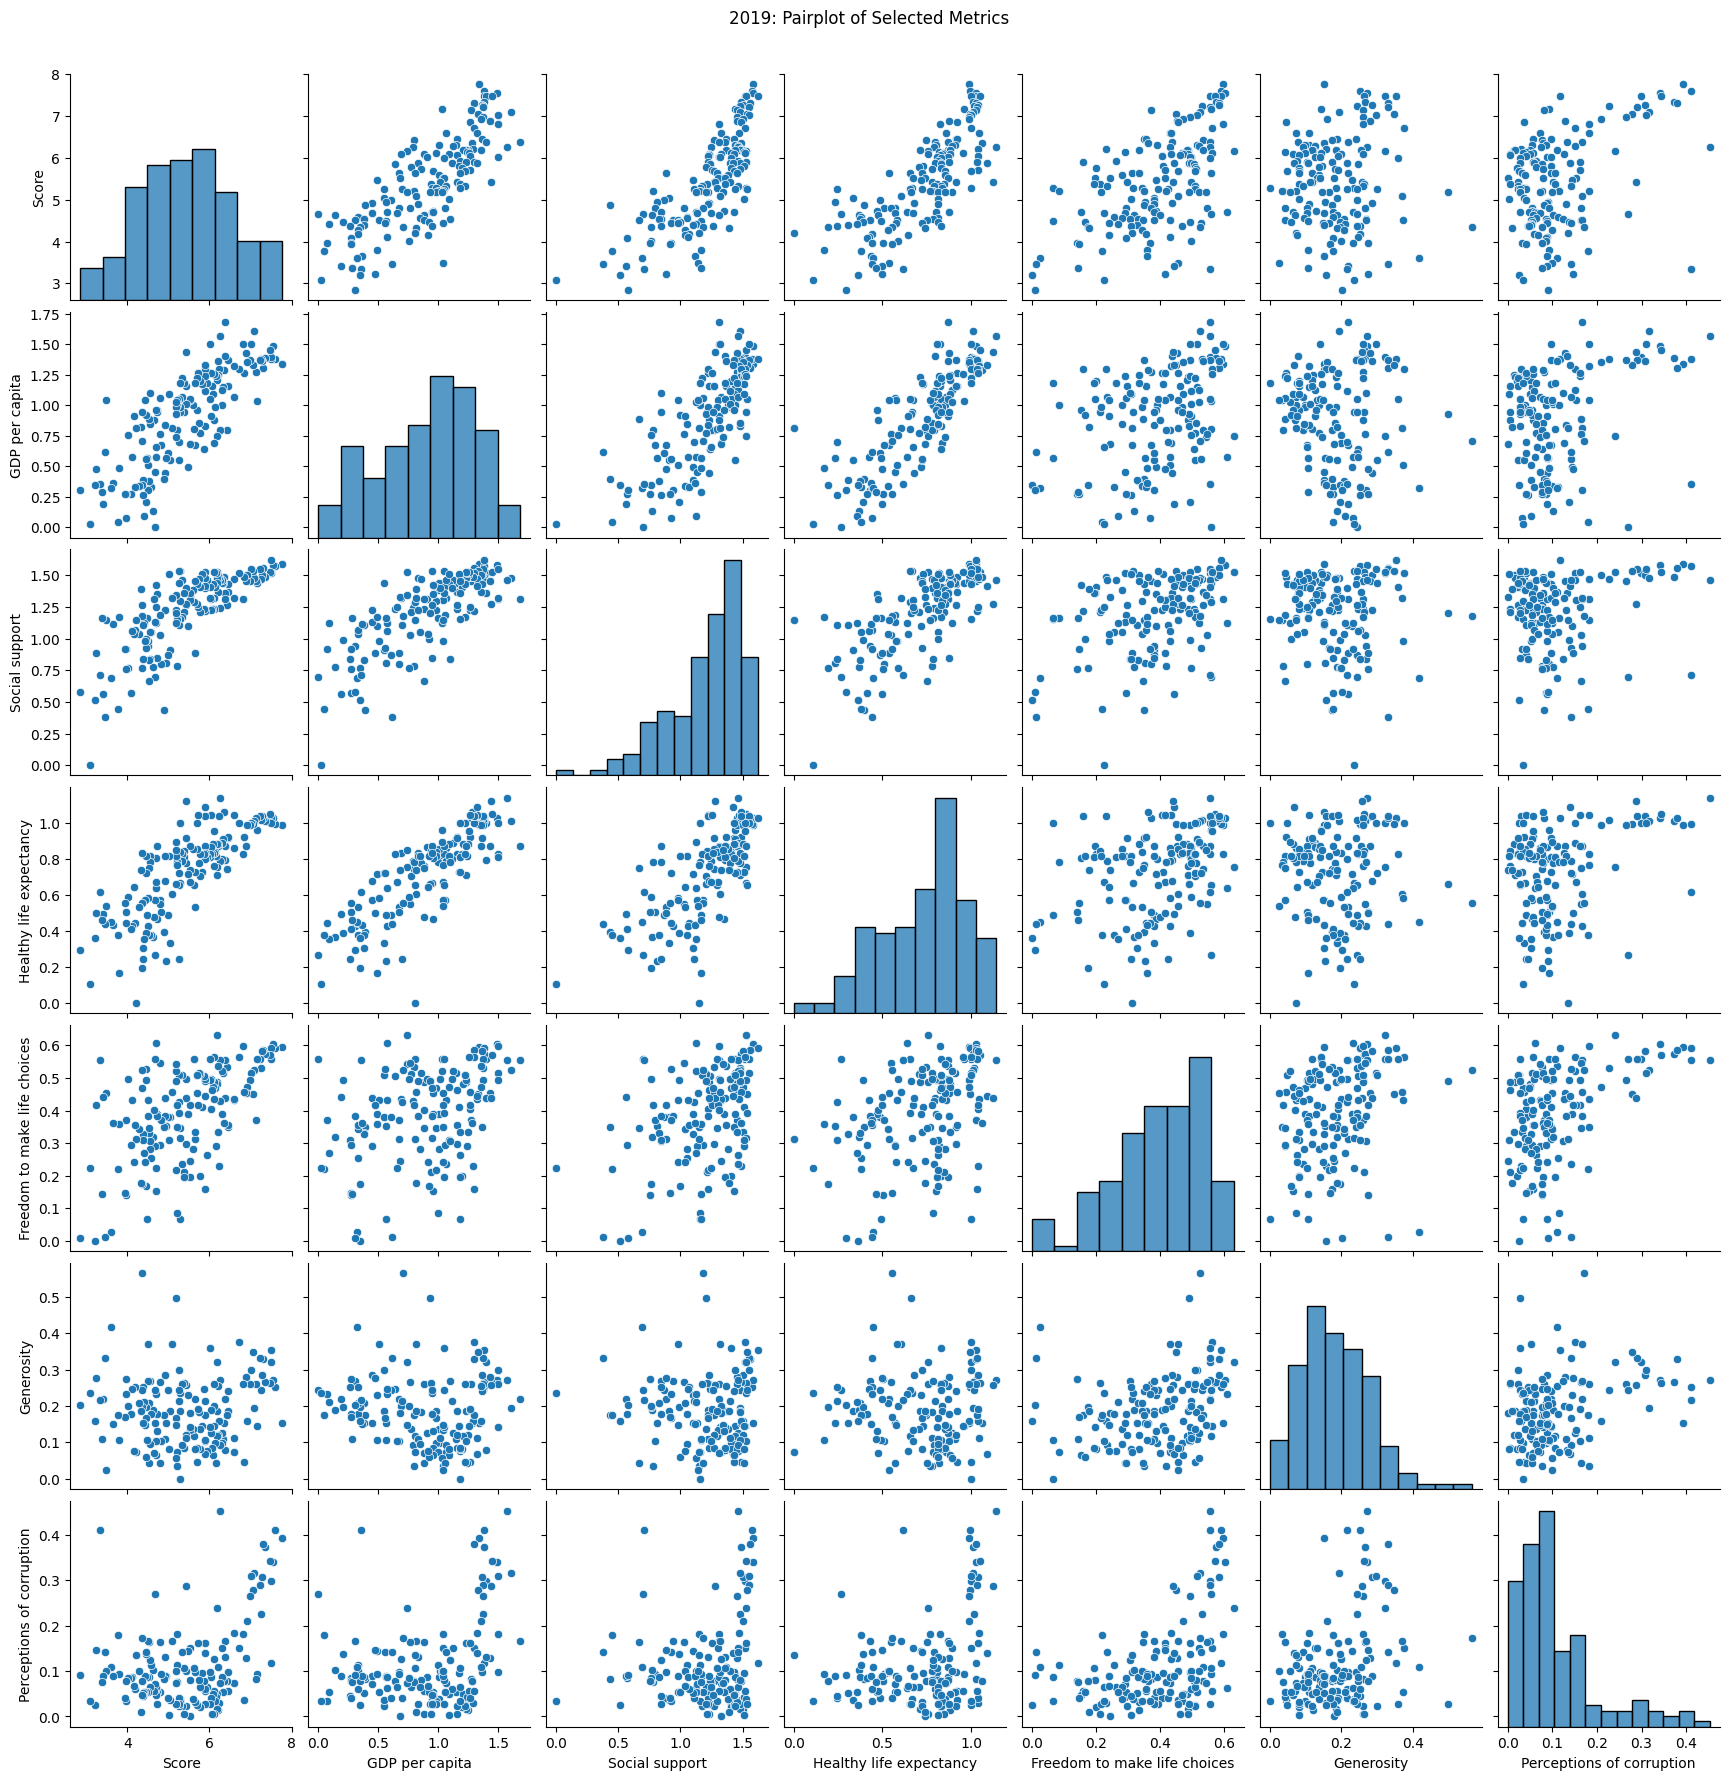

In [265]:
sns.pairplot(df_2019[cols_2019])
plt.suptitle("2019: Pairplot of Selected Metrics", y=1.02)
plt.show()

## Questions

### Q1: What countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness? 

#### 2015

In [278]:
idx = df_2015["Happiness Score"].idxmax()
print("Overall Happiness:", df_2015.loc[idx, "Country"], "-", df_2015.loc[idx, "Happiness Score"])

# Contributing factors for 2015
factors_2015 = {
    "Economy (GDP per Capita)": "Economy (GDP per Capita)",
    "Family": "Family",
    "Health (Life Expectancy)": "Health (Life Expectancy)",
    "Freedom": "Freedom",
    "Trust (Government Corruption)": "Trust (Government Corruption)",
    "Generosity": "Generosity"
}
for factor, col in factors_2015.items():
    idx = df_2015[col].idxmax()
    print(f"{factor}:", df_2015.loc[idx, "Country"], "-", df_2015.loc[idx, col])

Overall Happiness: Switzerland - 7.587
Economy (GDP per Capita): Qatar - 1.69042
Family: Iceland - 1.40223
Health (Life Expectancy): Singapore - 1.02525
Freedom: Norway - 0.66973
Trust (Government Corruption): Rwanda - 0.55191
Generosity: Myanmar - 0.79588


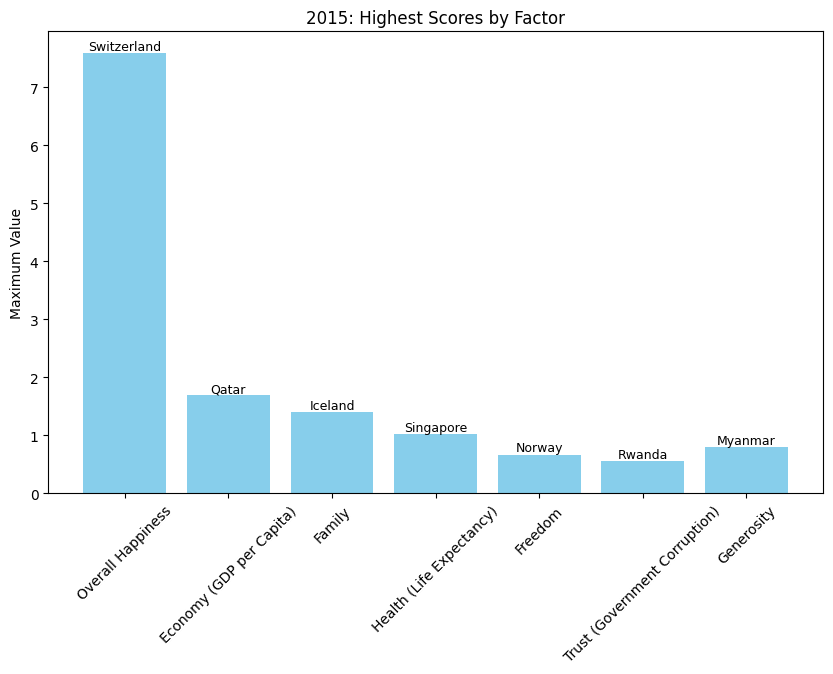

In [289]:
# Mapping for 2015: Factor name -> (Data column, Country column)
mapping_2015 = {
    "Overall Happiness": ("Happiness Score", "Country"),
    "Economy (GDP per Capita)": ("Economy (GDP per Capita)", "Country"),
    "Family": ("Family", "Country"),
    "Health (Life Expectancy)": ("Health (Life Expectancy)", "Country"),
    "Freedom": ("Freedom", "Country"),
    "Trust (Government Corruption)": ("Trust (Government Corruption)", "Country"),
    "Generosity": ("Generosity", "Country")
}

max_values = {}
max_countries = {}

for factor, (col, country_col) in mapping_2015.items():
    idx = df_2015[col].idxmax()
    max_values[factor] = df_2015.loc[idx, col]
    max_countries[factor] = df_2015.loc[idx, country_col]

plt.figure(figsize=(10,6))
bars = plt.bar(max_values.keys(), max_values.values(), color='skyblue')
plt.ylabel("Maximum Value")
plt.title("2015: Highest Scores by Factor")
for bar, factor in zip(bars, max_values.keys()):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, max_countries[factor], ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=45)
plt.show()


#### 2016

In [280]:
idx = df_2016["Happiness Score"].idxmax()
print("Overall Happiness:", df_2016.loc[idx, "Country"], "-", df_2016.loc[idx, "Happiness Score"])

# Contributing factors for 2016
factors_2016 = {
    "Economy (GDP per Capita)": "Economy (GDP per Capita)",
    "Family": "Family",
    "Health (Life Expectancy)": "Health (Life Expectancy)",
    "Freedom": "Freedom",
    "Trust (Government Corruption)": "Trust (Government Corruption)",
    "Generosity": "Generosity"
}
for factor, col in factors_2016.items():
    idx = df_2016[col].idxmax()
    print(f"{factor}:", df_2016.loc[idx, "Country"], "-", df_2016.loc[idx, col])

Overall Happiness: Denmark - 7.526
Economy (GDP per Capita): Qatar - 1.82427
Family: Iceland - 1.18326
Health (Life Expectancy): Hong Kong - 0.95277
Freedom: Uzbekistan - 0.60848
Trust (Government Corruption): Rwanda - 0.50521
Generosity: Myanmar - 0.81971


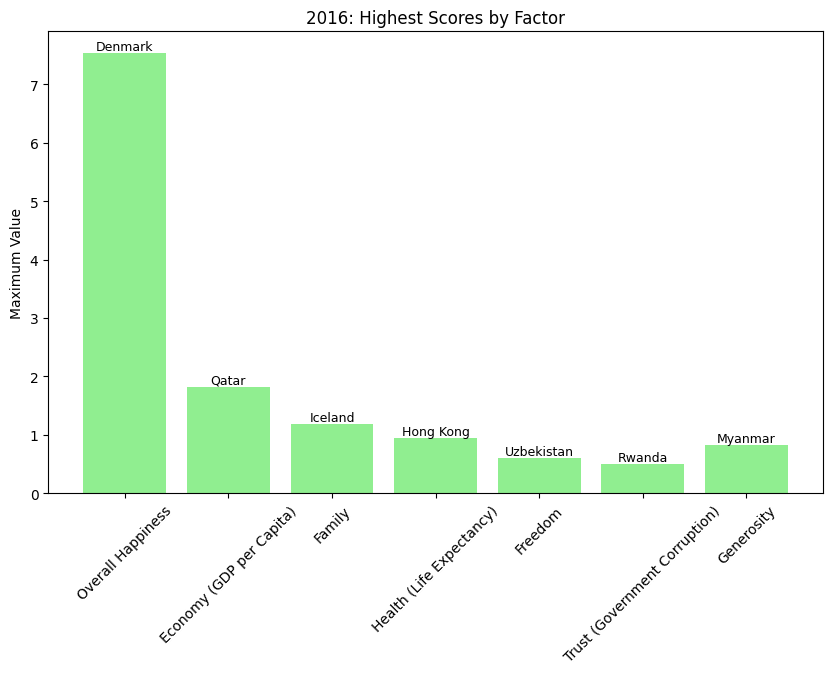

In [290]:
# Mapping for 2016 is the same as 2015
mapping_2016 = mapping_2015

max_values = {}
max_countries = {}

for factor, (col, country_col) in mapping_2016.items():
    idx = df_2016[col].idxmax()
    max_values[factor] = df_2016.loc[idx, col]
    max_countries[factor] = df_2016.loc[idx, country_col]

plt.figure(figsize=(10,6))
bars = plt.bar(max_values.keys(), max_values.values(), color='lightgreen')
plt.ylabel("Maximum Value")
plt.title("2016: Highest Scores by Factor")
for bar, factor in zip(bars, max_values.keys()):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, max_countries[factor], ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=45)
plt.show()


#### 2017

In [281]:
idx = df_2017["Happiness.Score"].idxmax()
print("Overall Happiness:", df_2017.loc[idx, "Country"], "-", df_2017.loc[idx, "Happiness.Score"])

# Contributing factors for 2017
factors_2017 = {
    "Economy (GDP per Capita)": "Economy..GDP.per.Capita.",
    "Family": "Family",
    "Health (Life Expectancy)": "Health..Life.Expectancy.",
    "Freedom": "Freedom",
    "Trust (Government Corruption)": "Trust..Government.Corruption.",
    "Generosity": "Generosity"
}
for factor, col in factors_2017.items():
    idx = df_2017[col].idxmax()
    print(f"{factor}:", df_2017.loc[idx, "Country"], "-", df_2017.loc[idx, col])

Overall Happiness: Norway - 7.53700017929077
Economy (GDP per Capita): Qatar - 1.87076568603516
Family: Iceland - 1.6105740070343
Health (Life Expectancy): Singapore - 0.949492394924164
Freedom: Uzbekistan - 0.658248662948608
Trust (Government Corruption): Singapore - 0.46430778503418
Generosity: Myanmar - 0.838075160980225


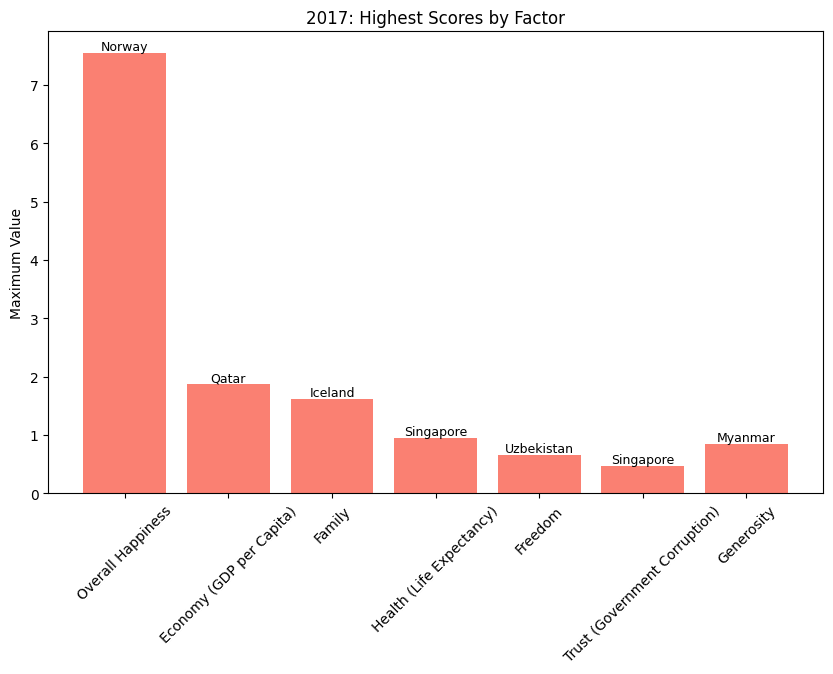

In [291]:
# Mapping for 2017 (note the different column names)
mapping_2017 = {
    "Overall Happiness": ("Happiness.Score", "Country"),
    "Economy (GDP per Capita)": ("Economy..GDP.per.Capita.", "Country"),
    "Family": ("Family", "Country"),
    "Health (Life Expectancy)": ("Health..Life.Expectancy.", "Country"),
    "Freedom": ("Freedom", "Country"),
    "Trust (Government Corruption)": ("Trust..Government.Corruption.", "Country"),
    "Generosity": ("Generosity", "Country")
}

max_values = {}
max_countries = {}

for factor, (col, country_col) in mapping_2017.items():
    idx = df_2017[col].idxmax()
    max_values[factor] = df_2017.loc[idx, col]
    max_countries[factor] = df_2017.loc[idx, country_col]

plt.figure(figsize=(10,6))
bars = plt.bar(max_values.keys(), max_values.values(), color='salmon')
plt.ylabel("Maximum Value")
plt.title("2017: Highest Scores by Factor")
for bar, factor in zip(bars, max_values.keys()):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, max_countries[factor], ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=45)
plt.show()


#### 2018

In [282]:
idx = df_2018["Score"].idxmax()
print("Overall Happiness:", df_2018.loc[idx, "Country or region"], "-", df_2018.loc[idx, "Score"])

# Contributing factors for 2018
factors_2018 = {
    "GDP per Capita": "GDP per capita",
    "Social Support": "Social support",
    "Healthy Life Expectancy": "Healthy life expectancy",
    "Freedom to Make Life Choices": "Freedom to make life choices",
    "Generosity": "Generosity",
    "Perceptions of Corruption": "Perceptions of corruption"
}
for factor, col in factors_2018.items():
    idx = df_2018[col].idxmax()
    print(f"{factor}:", df_2018.loc[idx, "Country or region"], "-", df_2018.loc[idx, col])


Overall Happiness: Finland - 7.632
GDP per Capita: United Arab Emirates - 2.096
Social Support: Iceland - 1.644
Healthy Life Expectancy: Hong Kong - 1.03
Freedom to Make Life Choices: Uzbekistan - 0.724
Generosity: Myanmar - 0.598
Perceptions of Corruption: Singapore - 0.457


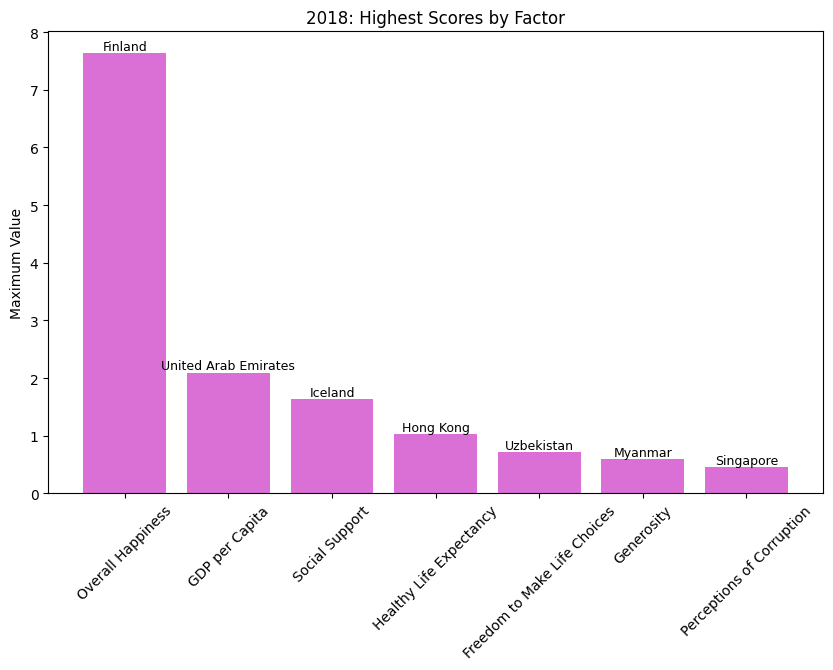

In [292]:
# Mapping for 2018 (using 'Score' and 'Country or region')
mapping_2018 = {
    "Overall Happiness": ("Score", "Country or region"),
    "GDP per Capita": ("GDP per capita", "Country or region"),
    "Social Support": ("Social support", "Country or region"),
    "Healthy Life Expectancy": ("Healthy life expectancy", "Country or region"),
    "Freedom to Make Life Choices": ("Freedom to make life choices", "Country or region"),
    "Generosity": ("Generosity", "Country or region"),
    "Perceptions of Corruption": ("Perceptions of corruption", "Country or region")
}

max_values = {}
max_countries = {}

for factor, (col, country_col) in mapping_2018.items():
    idx = df_2018[col].idxmax()
    max_values[factor] = df_2018.loc[idx, col]
    max_countries[factor] = df_2018.loc[idx, country_col]

plt.figure(figsize=(10,6))
bars = plt.bar(max_values.keys(), max_values.values(), color='orchid')
plt.ylabel("Maximum Value")
plt.title("2018: Highest Scores by Factor")
for bar, factor in zip(bars, max_values.keys()):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, max_countries[factor], ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=45)
plt.show()


#### 2019

In [283]:
idx = df_2019["Score"].idxmax()
print("Overall Happiness:", df_2019.loc[idx, "Country or region"], "-", df_2019.loc[idx, "Score"])

# Contributing factors for 2019 (same as 2018)
factors_2019 = {
    "GDP per Capita": "GDP per capita",
    "Social Support": "Social support",
    "Healthy Life Expectancy": "Healthy life expectancy",
    "Freedom to Make Life Choices": "Freedom to make life choices",
    "Generosity": "Generosity",
    "Perceptions of Corruption": "Perceptions of corruption"
}
for factor, col in factors_2019.items():
    idx = df_2019[col].idxmax()
    print(f"{factor}:", df_2019.loc[idx, "Country or region"], "-", df_2019.loc[idx, col])

Overall Happiness: Finland - 7.769
GDP per Capita: Qatar - 1.684
Social Support: Iceland - 1.624
Healthy Life Expectancy: Singapore - 1.141
Freedom to Make Life Choices: Uzbekistan - 0.631
Generosity: Myanmar - 0.566
Perceptions of Corruption: Singapore - 0.453


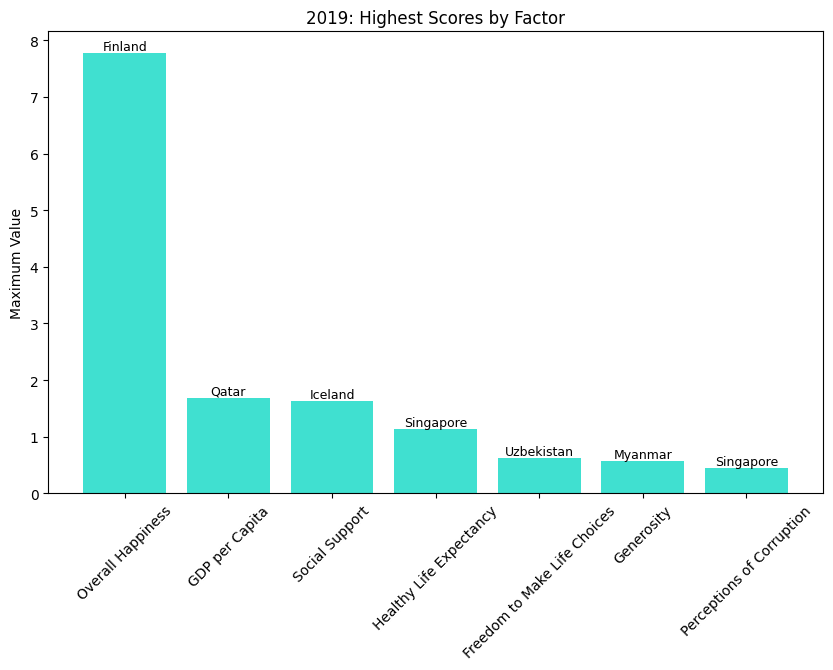

In [293]:
# Mapping for 2019 is the same as 2018
mapping_2019 = mapping_2018

max_values = {}
max_countries = {}

for factor, (col, country_col) in mapping_2019.items():
    idx = df_2019[col].idxmax()
    max_values[factor] = df_2019.loc[idx, col]
    max_countries[factor] = df_2019.loc[idx, country_col]

plt.figure(figsize=(10,6))
bars = plt.bar(max_values.keys(), max_values.values(), color='turquoise')
plt.ylabel("Maximum Value")
plt.title("2019: Highest Scores by Factor")
for bar, factor in zip(bars, max_values.keys()):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, max_countries[factor], ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=45)
plt.show()


### Q2: How did country ranks or scores change between the 2015 and 2016 as well as the 2016 and 2017 reports?

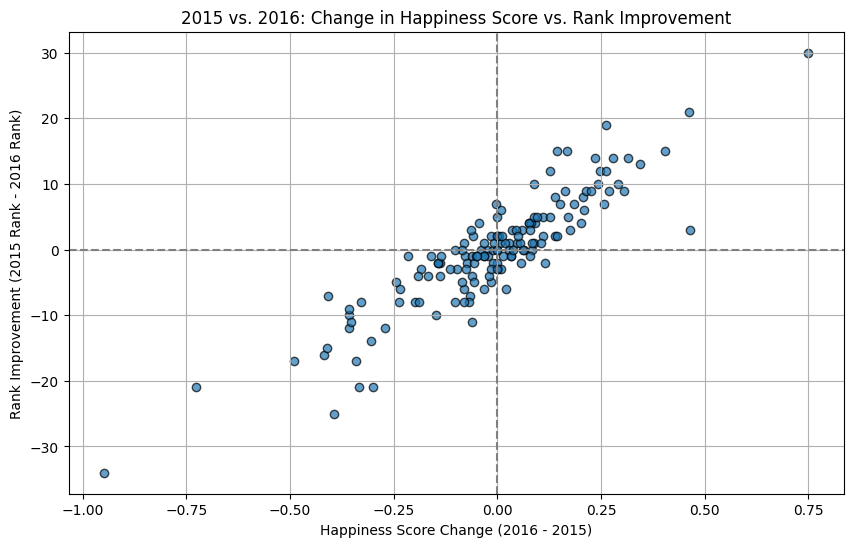

In [300]:
# Merge the 2015 and 2016 datasets on 'Country'
df_15_16 = pd.merge(df_2015, df_2016, on='Country', suffixes=('_2015', '_2016'))

# Calculate the changes:
# Using old rank minus new rank, so positive values indicate an improvement.
df_15_16['Rank Improvement'] = df_15_16['Happiness Rank_2015'] - df_15_16['Happiness Rank_2016']
df_15_16['Score Change'] = df_15_16['Happiness Score_2016'] - df_15_16['Happiness Score_2015']

# Create a scatter plot for 2015 vs. 2016 changes
plt.figure(figsize=(10,6))
plt.scatter(df_15_16['Score Change'], df_15_16['Rank Improvement'], alpha=0.7, edgecolor='k')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title("2015 vs. 2016: Change in Happiness Score vs. Rank Improvement")
plt.xlabel("Happiness Score Change (2016 - 2015)")
plt.ylabel("Rank Improvement (2015 Rank - 2016 Rank)")
plt.grid(True)
plt.show()


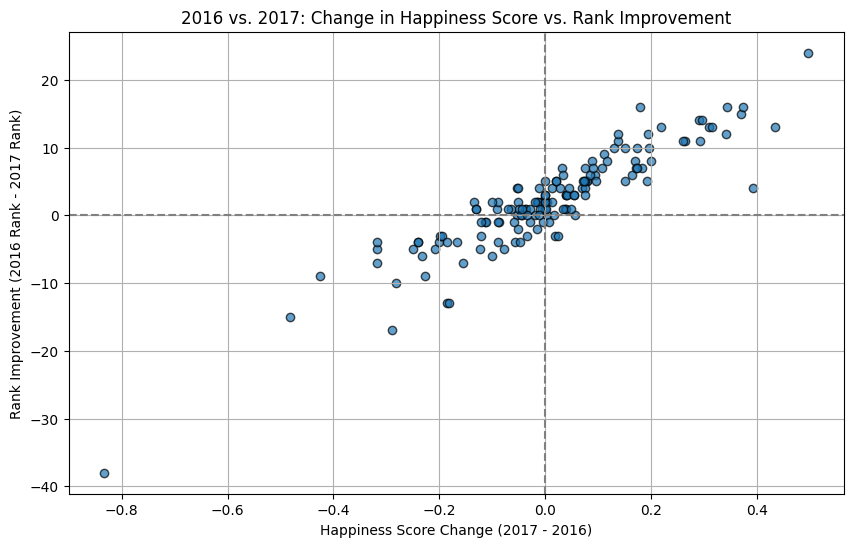

In [301]:
# Rename columns in df_2017 to match 2016's naming convention
df_2017_renamed = df_2017.rename(columns={'Happiness.Rank': 'Happiness Rank', 
                                           'Happiness.Score': 'Happiness Score'})

# Merge the 2016 and renamed 2017 datasets on 'Country'
df_16_17 = pd.merge(df_2016, df_2017_renamed, on='Country', suffixes=('_2016', '_2017'))

# Calculate the changes using old rank minus new rank for improvement.
df_16_17['Rank Improvement'] = df_16_17['Happiness Rank_2016'] - df_16_17['Happiness Rank_2017']
df_16_17['Score Change'] = df_16_17['Happiness Score_2017'] - df_16_17['Happiness Score_2016']

# Create a scatter plot for 2016 vs. 2017 changes
plt.figure(figsize=(10,6))
plt.scatter(df_16_17['Score Change'], df_16_17['Rank Improvement'], alpha=0.7, edgecolor='k')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title("2016 vs. 2017: Change in Happiness Score vs. Rank Improvement")
plt.xlabel("Happiness Score Change (2017 - 2016)")
plt.ylabel("Rank Improvement (2016 Rank - 2017 Rank)")
plt.grid(True)
plt.show()


### Q3: Did any country experience a significant increase or decrease in happiness?

In [309]:
# Define a threshold for significant change
threshold = 0.5

# 2015 to 2016
df_15_16['Significant Change'] = df_15_16['Score Change'].apply(lambda x: abs(x) > threshold)
significant_15_16 = df_15_16[df_15_16['Significant Change']]
print("Significant changes between 2015 and 2016:")
print(significant_15_16[['Country', 'Happiness Score_2015', 'Happiness Score_2016', 'Score Change']])

# 2016 to 2017
df_16_17['Significant Change'] = df_16_17['Score Change'].apply(lambda x: abs(x) > threshold)
significant_16_17 = df_16_17[df_16_17['Significant Change']]
print("\nSignificant changes between 2016 and 2017:")
print(significant_16_17[['Country', 'Happiness Score_2016', 'Happiness Score_2017', 'Score Change']])

# 2017 to 2018
df_17_18 = pd.merge(df_2017_renamed, df_2018, left_on="Country", right_on="Country or region", suffixes=('_2017', '_2018'))
df_17_18['Score Change'] = df_17_18['Score'] - df_17_18['Happiness Score']
df_17_18['Significant Change'] = df_17_18['Score Change'].apply(lambda x: abs(x) > threshold)
significant_17_18 = df_17_18[df_17_18['Significant Change']]
print("\nSignificant changes between 2017 and 2018:")
print(significant_17_18[['Country', 'Happiness Score', 'Score', 'Score Change']])

# 2018 to 2019
df_18_19 = pd.merge(df_2018, df_2019, on="Country or region", suffixes=('_2018', '_2019'))
df_18_19['Score Change'] = df_18_19['Score_2019'] - df_18_19['Score_2018']
df_18_19['Significant Change'] = df_18_19['Score Change'].apply(lambda x: abs(x) > threshold)
significant_18_19 = df_18_19[df_18_19['Significant Change']]
print("\nSignificant changes between 2018 and 2019:")
print(significant_18_19[['Country or region', 'Score_2018', 'Score_2019', 'Score Change']])


Significant changes between 2015 and 2016:
       Country  Happiness Score_2015  Happiness Score_2016  Score Change
21   Venezuela                 6.810                 6.084        -0.726
66     Algeria                 5.605                 6.355         0.750
110    Liberia                 4.571                 3.622        -0.949

Significant changes between 2016 and 2017:
      Country  Happiness Score_2016  Happiness Score_2017  Score Change
40  Venezuela                 6.084                  5.25        -0.834

Significant changes between 2017 and 2018:
     Country  Happiness Score  Score  Score Change
50   Algeria            5.872  5.295        -0.577
71   Jamaica            5.311  5.890         0.579
126    Ghana            4.120  4.657         0.537
145     Togo            3.495  3.999         0.504

Significant changes between 2018 and 2019:
    Country or region  Score_2018  Score_2019  Score Change
34           Malaysia       6.322       5.339        -0.983
133           

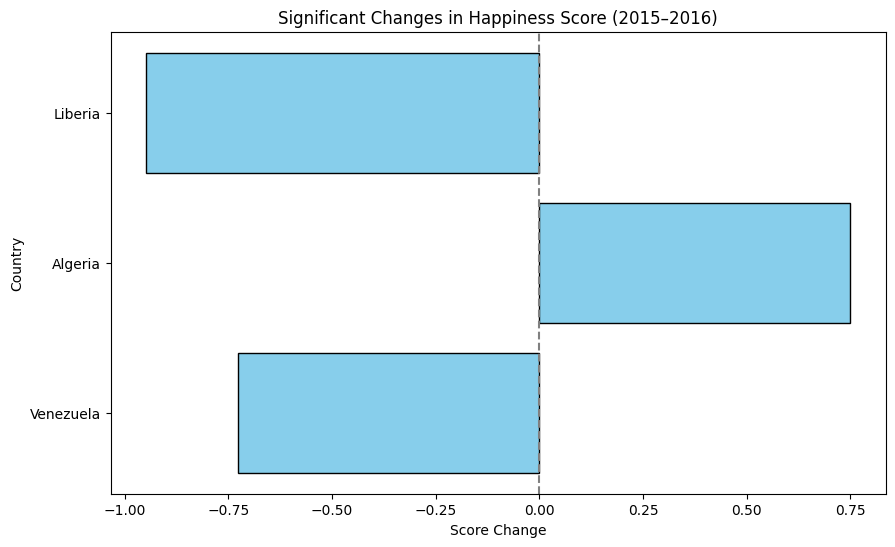

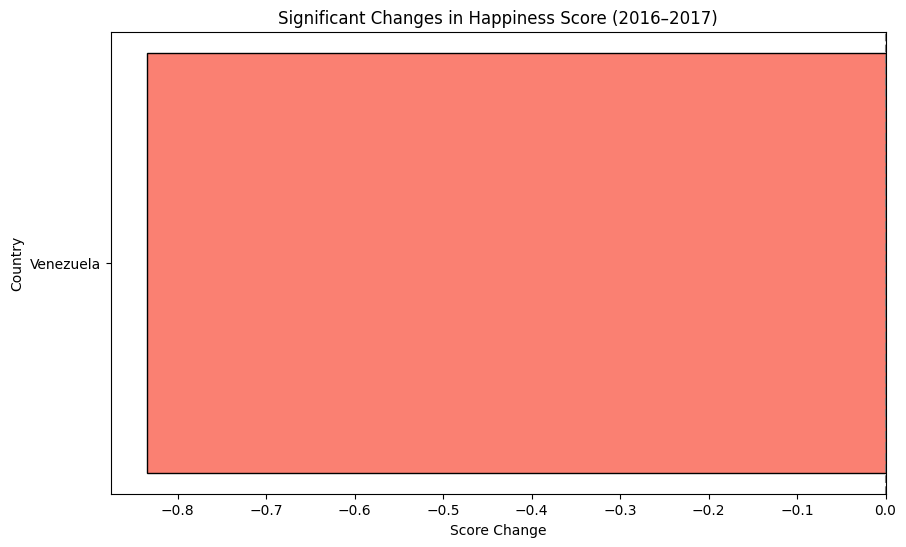

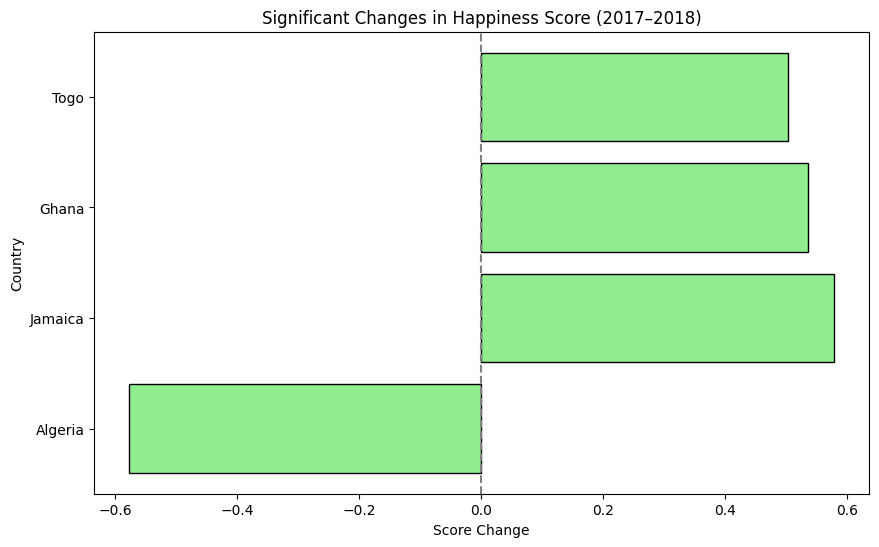

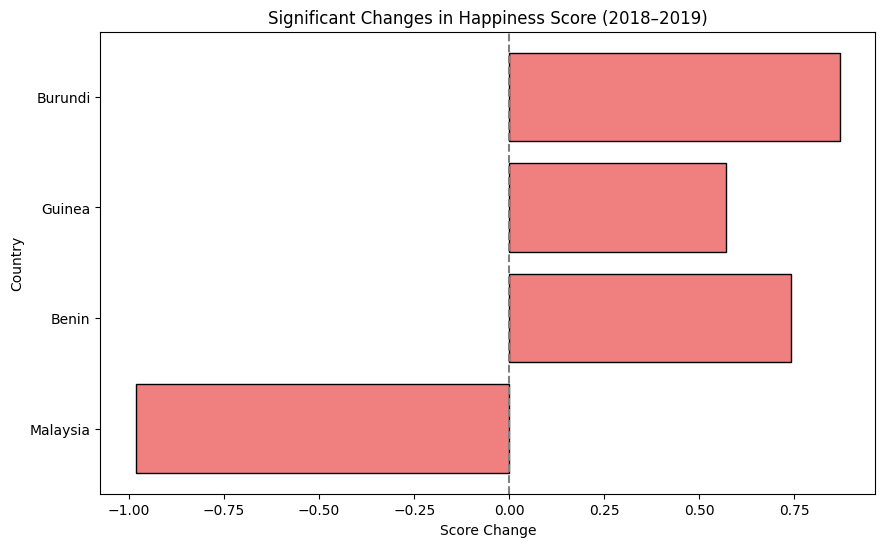

In [310]:
def plot_significant_changes(data, year_range, color):
    """
    Creates a horizontal bar chart to visualize significant changes in happiness scores.
    """
    plt.figure(figsize=(10, 6))
    plt.barh(data['Country'], data['Score Change'], color=color, edgecolor='black')
    plt.axvline(0, color='gray', linestyle='--')
    plt.title(f"Significant Changes in Happiness Score ({year_range})")
    plt.xlabel("Score Change")
    plt.ylabel("Country")
    plt.show()

# Visualize for 2015–2016
plot_significant_changes(significant_15_16, "2015–2016", "skyblue")

# Visualize for 2016–2017
plot_significant_changes(significant_16_17, "2016–2017", "salmon")

# Visualize for 2017–2018
plot_significant_changes(significant_17_18.rename(columns={'Country': 'Country'}), "2017–2018", "lightgreen")

# Visualize for 2018–2019
plot_significant_changes(significant_18_19.rename(columns={'Country or region': 'Country'}), "2018–2019", "lightcoral")
